In [47]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import re 
import string
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
# display only 15 rows of results in each cell
pd.options.display.max_rows = 15
pd.set_option('display.max_columns', 50)

### <font color='orange'>Preprocessing Data - File with 8 Topics</font>

In [3]:
df = pd.read_pickle('df_with_lyric_8_topics.pickle')

In [4]:
df.columns

Index(['lyrics', 'num_syllables', 'pos', 'year', 'fog_index', 'flesch_index',
       'num_words', 'num_lines', 'title', 'f_k_grade', 'artist',
       'difficult_words', 'num_dupes', 'neg', 'neu', 'compound', 'id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'uri', 'analysis_url',
       'artist_with_features', 'year_bin', 'image', 'cluster', 'Gender',
       'tags', 'lyric', 'lyrics_data', 'topic1', 'topic2', 'topic3', 'topic4',
       'topic5', 'topic6', 'topic7', 'topic8'],
      dtype='object')

In [5]:
df.head()

lyrics  num_syllables    pos  \
0  Mona Lisa, Mona Lisa, men have named you\nYou'...          189.0  0.199   
1  I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...          270.9  0.224   
2  I was dancing with my darling to the Tennessee...          174.6  0.351   
3  Each time I hold someone new\nMy arms grow col...          135.9  0.231   
4  Unfortunately, we are not licensed to display ...           46.8  0.079   

   year  fog_index  flesch_index  num_words  num_lines               title  \
0  1950        5.2         88.74        145         17           Mona Lisa   
1  1950        4.4         82.31        189         31    I Wanna Be Loved   
2  1950        5.2         88.74        138         16     Tennessee Waltz   
3  1950        4.4         99.23        117         18  I'll Never Be Free   
4  1950        6.0         69.79         32          3         All My Love   

   f_k_grade                artist  difficult_words  num_dupes    neg    neu  \
0        2.9         Nat King Cole               13         10  0.155  0.646   
1        3.3       Andrews Sisters               40         32  0.036  0.740   
2        2.9            Patti Page                5         10  0.053  0.596   
3        0.9  Tennessee Ernie Ford               10          3  0.167  0.602   
4        6.0            Patti Page                9          0  0.070  0.850   

   compound                      id  danceability  energy  key  loudness  \
0    0.8443  3k5ycyXX5qsCjLd7R2vphp         0.214   0.194    1   -15.636   
1    0.9897  4UY81WrDU3jTROGaKuz4uZ         0.358   0.085    8   -13.664   
2    0.9948  6DKt9vMnMN0HmlnK3EAHRQ         0.424   0.163    3   -15.899   
3    0.8842  0KnD456yC5JuweN932Ems3         0.697   0.182    7   -12.586   
4    0.0772  05sXHTLqIpwywbpui1JT4o         0.631   0.273    8   -11.538   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0325         0.903          0.000001     0.107    0.339   
1     1       0.0389         0.939          0.000000     0.160    0.181   
2     1       0.0276         0.784          0.000671     0.116    0.294   
3     1       0.0357         0.780          0.000000     0.126    0.474   
4     1       0.0408         0.801          0.000000     0.158    0.633   

     tempo  duration_ms  time_signature                                   uri  \
0   86.198     207573.0               3  spotify:track:3k5ycyXX5qsCjLd7R2vphp   
1  170.869     198027.0               5  spotify:track:4UY81WrDU3jTROGaKuz4uZ   
2   86.335     182733.0               3  spotify:track:6DKt9vMnMN0HmlnK3EAHRQ   
3   82.184     158000.0               3  spotify:track:0KnD456yC5JuweN932Ems3   
4  123.314     190933.0               4  spotify:track:05sXHTLqIpwywbpui1JT4o   

                                        analysis_url artist_with_features  \
0  https://api.spotify.com/v1/audio-analysis/3k5y...                  NaN   
1  https://api.spotify.com/v1/audio-analysis/4UY8...       Gordon Jenkins   
2  https://api.spotify.com/v1/audio-analysis/6DKt...                  NaN   
3  https://api.spotify.com/v1/audio-analysis/0KnD...            Kay Starr   
4  https://api.spotify.com/v1/audio-analysis/05sX...                  NaN   

  year_bin                                              image       cluster  \
0      50s  https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...  String Lover   
1      50s  https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...  String Lover   
2      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   
3      50s  https://i.scdn.co/image/4bd427bb9181914d0fa448...  String Lover   
4      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   

   Gender                                               tags  \
0    male  [american, death by lung cancer, easy listenin...   
1   Group                                  [andrews sisters]   
2  female                                     [country, pop]   
3    male                [death by liv

In [6]:
# do some cleansing as I detect there are some songs with missing values in 'danceability','energy','key','loudness','acousticness' etc..
# there are more features missing but they happen at the same time
# so I just need to create mask to filter a few columns
mask = (df['danceability'] == 0) & (df['loudness'] == 0) & (df['acousticness'] == 0)

In [7]:
df[mask]

lyrics  num_syllables    pos  \
411   You say that you love (Say you love me)\nAll o...          342.9  0.268   
433   Whoa, can't you see that she's mine\nWe've bee...          283.5  0.111   
472   The name game!\nShirley! \nShirley, Shirley bo...          339.3  0.086   
483   Here they come again, mmmm-mm-mm\nCatch us if ...          129.6  0.025   
531   And when I see the sign that, points one way\n...          192.6  0.022   
559   Well, they'll stone you when you're trying to ...          308.7  0.112   
588   I tell myself what's done is done\nI tell myse...          230.4  0.210   
...                                                 ...            ...    ...   
2899  Give it your all girl, give it all ya got\nYou...          549.0  0.212   
2994  \nRoll out! Roll out! Roll out! Roll out! Roll...          530.1  0.038   
3165  \nUh, uh, whooo, the bounce is back\nUh, uh, u...          615.6  0.132   
3542  Girl I'm in love with you baby.\nAnd I want yo...          459.0  0.097   
3577  Yeah\nYeah, I'm up at Brooklyn, now I'm down i...          835.2  0.170   
3603  Mr Hudson\nLet's dance in style\nLet's dance f...          755.1  0.123   
3630  Today was a fairytale\nYou were the prince\nI ...          437.4  0.130   

      year  fog_index  flesch_index  num_words  num_lines  \
411   1964        4.8         98.21        280         40   
433   1964        5.2        105.66        251         29   
472   1965        5.2         97.20        281         35   
483   1965        4.0        125.62        137         24   
531   1966        4.8         98.21        164         22   
559   1966        5.2         97.20        249         30   
588   1967        4.0        108.70        219         43   
...    ...        ...           ...        ...        ...   
2899  2001        4.8        106.67        490         66   
2994  2002        5.6         96.18        459         49   
3165  2004        4.8         98.21        528         67   
3542  2009        4.4         99.23        397         62   
3577  2010        4.8         98.21        670         84   
3603  2010        4.8         89.75        574         82   
3630  2010        4.0         91.78        344         62   

                              title  f_k_grade           artist  \
411                   Glad All Over        1.3  Dave Clark Five   
433   Can't You See That She's Mine        0.5  Dave Clark Five   
472                   The Name Game        1.7    Shirley Ellis   
483             Catch Us If You Can       -3.0  Dave Clark Five   
531                 Walk Away Renee        1.3       Left Banke   
559      Rainy Day Women #12 And 35        1.7        Bob Dylan   
588                  It Must Be Him       -0.7       Vicki Carr   
...                             ...        ...              ...   
2899                 He Loves U Not        0.1            Dream   
2994                       Roll Out        2.1         Ludacris   
3165                 Change Clothes        1.3            Jay-Z   
3542             Rockin' That Thang        0.9        The-Dream   
3577           Empire State of Mind        1.3            Jay-Z   
3603                  Young Forever        2.5            Jay-Z   
3630          Today Was A Fairytale        1.7     Taylor Swift   

      difficult_words  num_dupes    neg    neu  compound id  danceability  \
411                13         27  0.022  0.710    0.9979  0           0.0   
433                 8         14  0.084  0.805    0.8242  0           0.0   
472                40          5  0.031  0.883    0.9308  0           0.0   
483                 3         20  0.039  0.936   -0.2350  0           0.0   
531                 2         15  0.191  0.787   -0.9791  0           0.0   
559                12         13  0.066  0.821    0.8870  0           0.0   
588                11         11  0.160  0.630    0.4671  0           0.0   
...               ...        ...    ...    ...       ... ..           ...   
2899     

In [8]:
# filter out the masked songs (where features are missing)
df = df[mask != True]

In [9]:
# validate if we removed all songs with missing features
# seems like we removed them
df.loc[df['acousticness'].isnull()]

Empty DataFrame
Columns: [lyrics, num_syllables, pos, year, fog_index, flesch_index, num_words, num_lines, title, f_k_grade, artist, difficult_words, num_dupes, neg, neu, compound, id, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, uri, analysis_url, artist_with_features, year_bin, image, cluster, Gender, tags, lyric, lyrics_data, topic1, topic2, topic3, topic4, topic5, topic6, topic7, topic8]
Index: []

In [10]:
# remove unneeded columns for clustering analysis - lyrics, year (as I will only use year_bins), title, artist, 
# id, uri, analysis_url, artist_with_features, image, cluster, gender, tags, lyrics, lyrics_data
df_cluster = df.drop(['lyrics', 'year','title', 'artist','id', 'uri', 'analysis_url', 'artist_with_features', 'year_bin','image', 'cluster', 'Gender', 'tags', 'lyric', 'lyrics_data'], axis = 1)

In [11]:
df_cluster.shape

(3987, 33)

### <font color='orange'>Clustering - with 8 Topics</font>
Potential business case is to cluster on the dataset - then build song recommendation system on top of cluster results

##### <font color='black'>K Means Clustering</font>

In [12]:
# need to standardize the data before k means clustering
# StandardScaler didn't give me a good result, so I switched to MinMax scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# initialize the scaler
mn = MinMaxScaler()
ss = StandardScaler()

# fit the data using the scaler
# so df_std will be the object for me to train cluster model
df_std = mn.fit_transform(df_cluster.values)

In [13]:
df_std.shape

(3987, 33)

For n_clusters = 6 The average silhouette_score is : 0.15162553907616813
For n_clusters = 7 The average silhouette_score is : 0.13208757941979
For n_clusters = 8 The average silhouette_score is : 0.12186488770473726
For n_clusters = 9 The average silhouette_score is : 0.11717048861448631
For n_clusters = 10 The average silhouette_score is : 0.11593807988098799
For n_clusters = 11 The average silhouette_score is : 0.11006272884682958
For n_clusters = 12 The average silhouette_score is : 0.10837990992960662
For n_clusters = 13 The average silhouette_score is : 0.10568177190285438
For n_clusters = 14 The average silhouette_score is : 0.10141712319534499
For n_clusters = 15 The average silhouette_score is : 0.10153212624297048
For n_clusters = 16 The average silhouette_score is : 0.10260908773767269
For n_clusters = 17 The average silhouette_score is : 0.09720693634694799
For n_clusters = 18 The average silhouette_score is : 0.09330155980173062
For n_clusters = 19 The average silhouette_sc

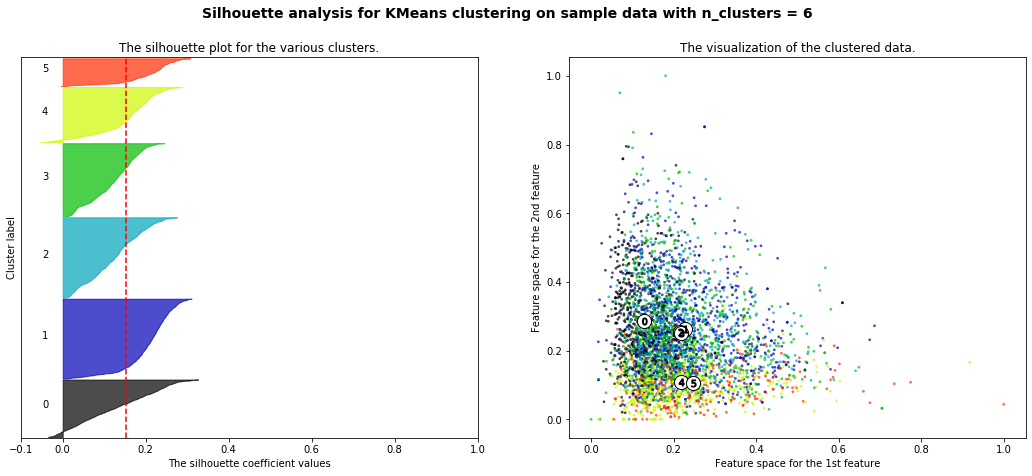

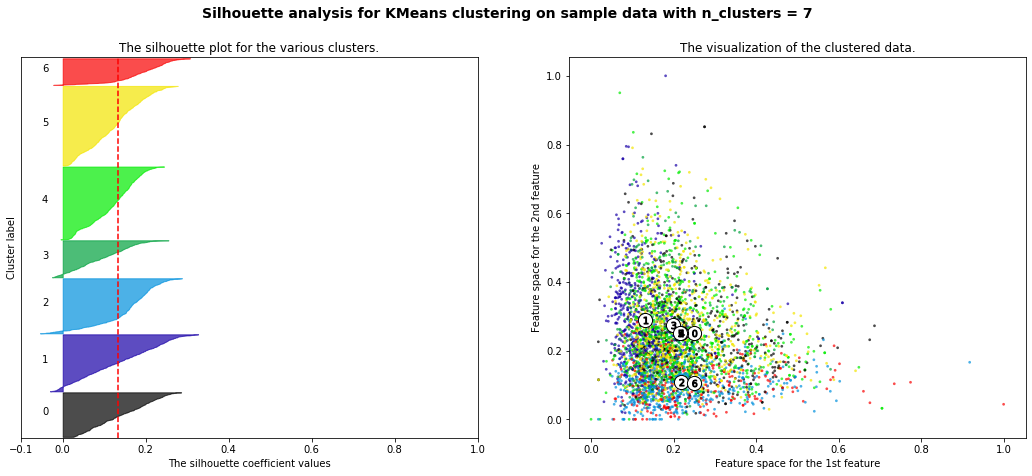

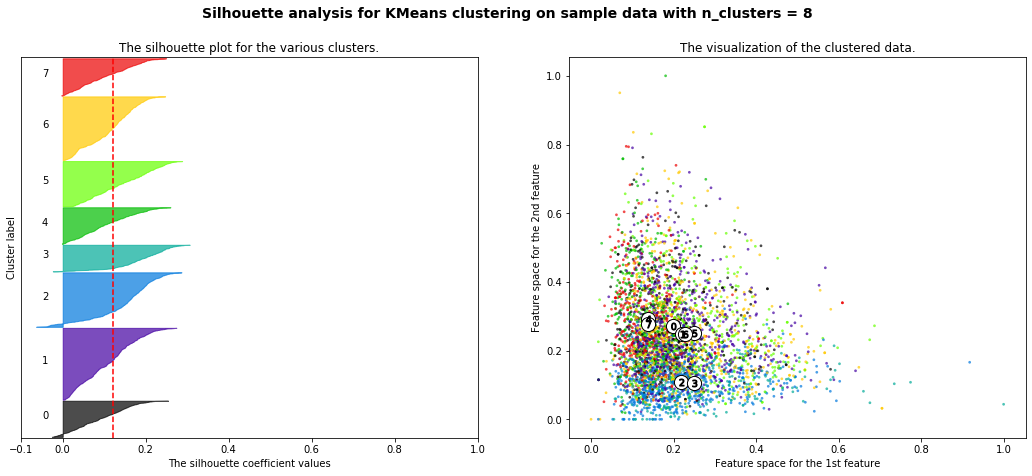

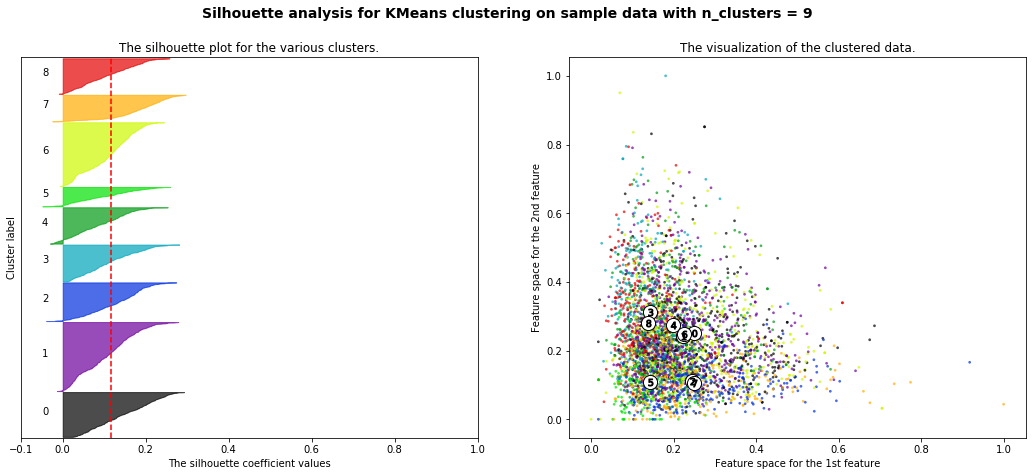

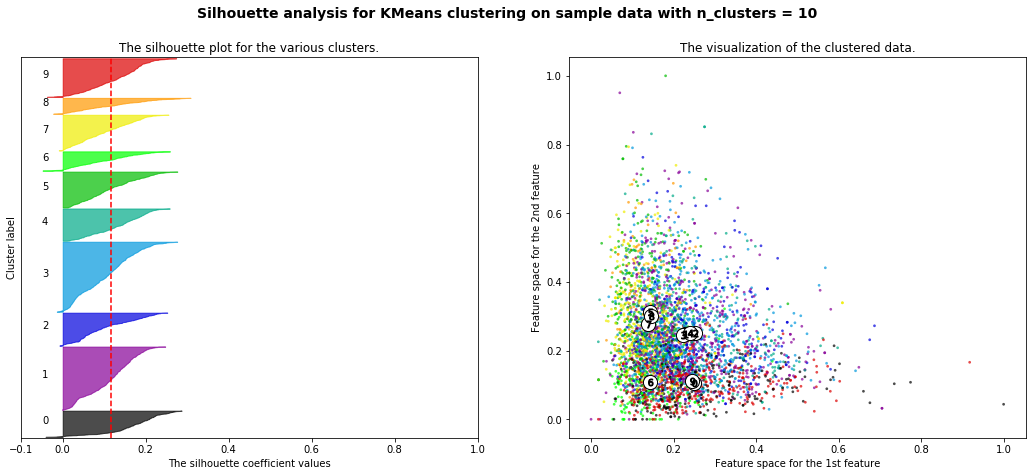

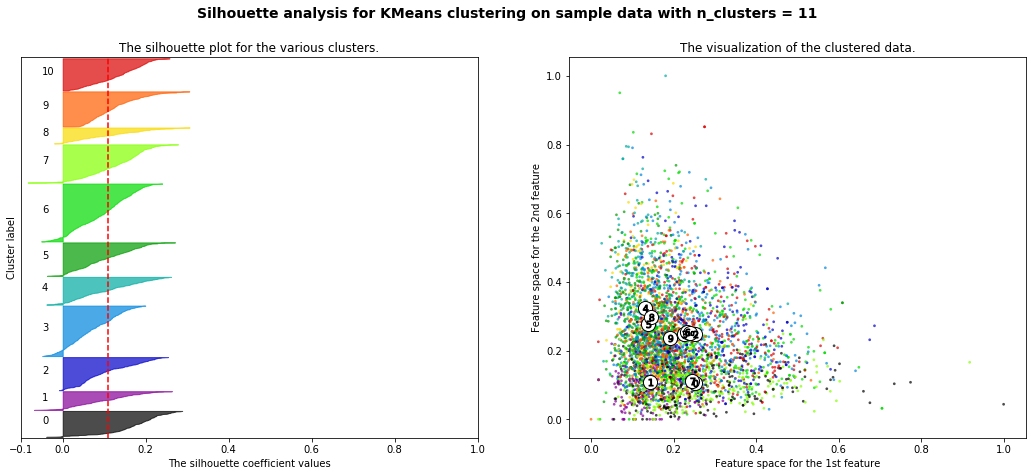

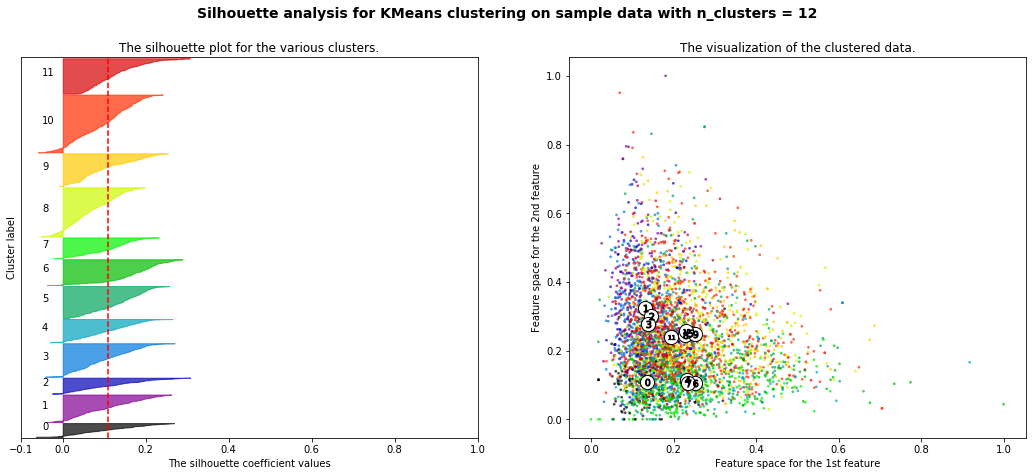

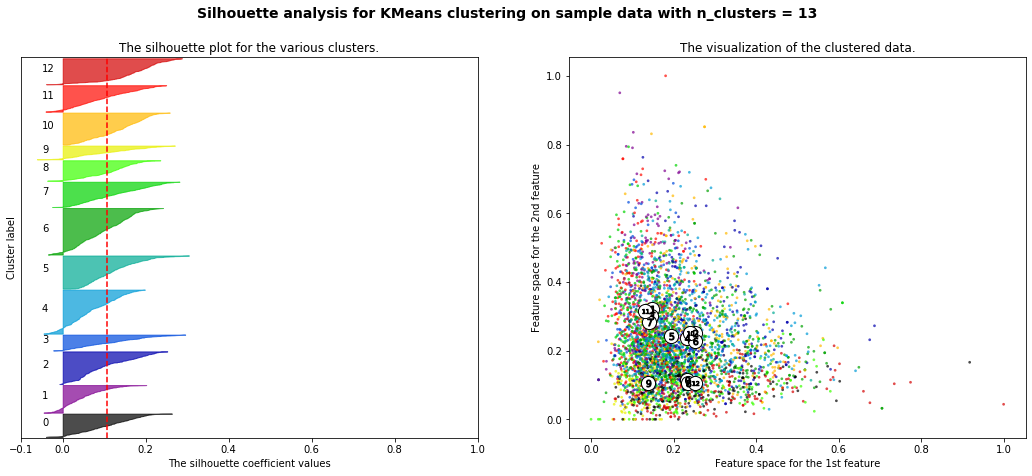

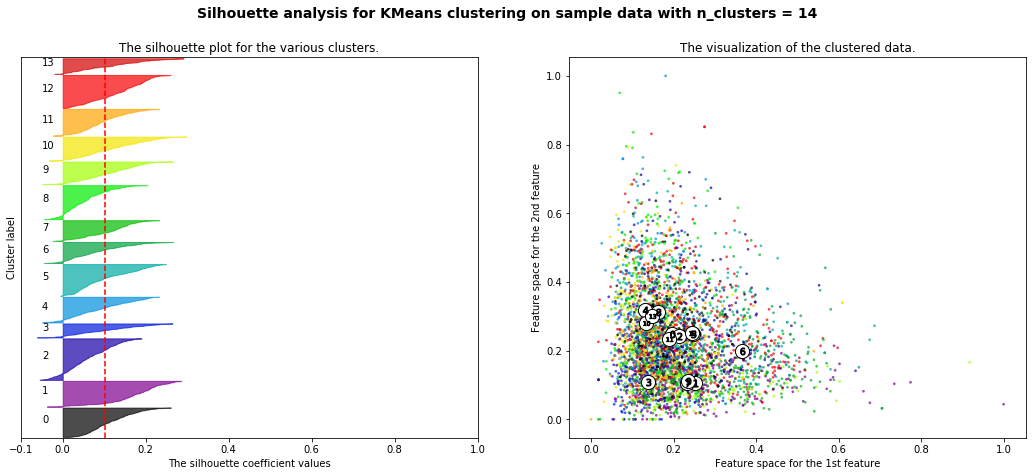

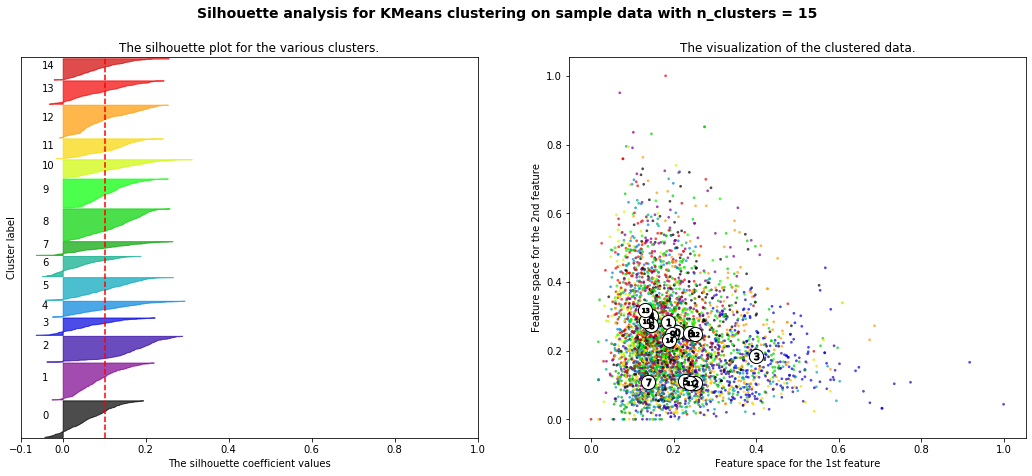

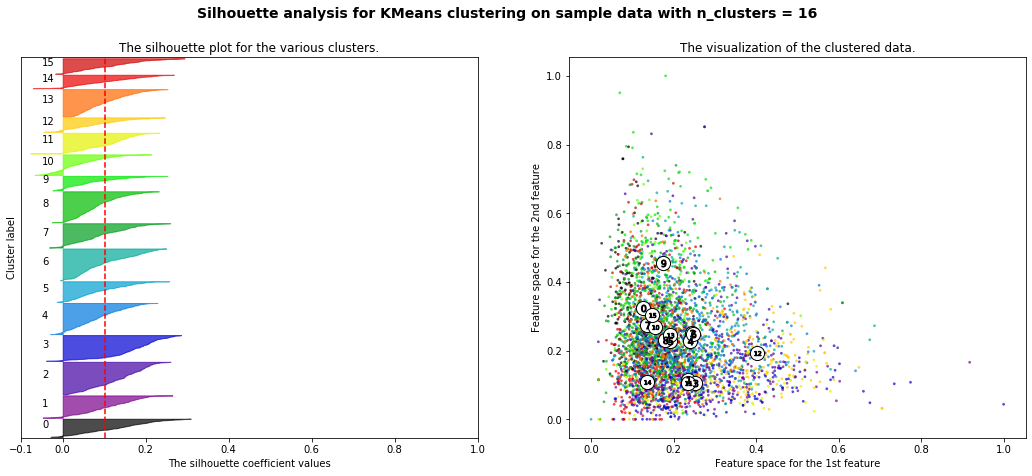

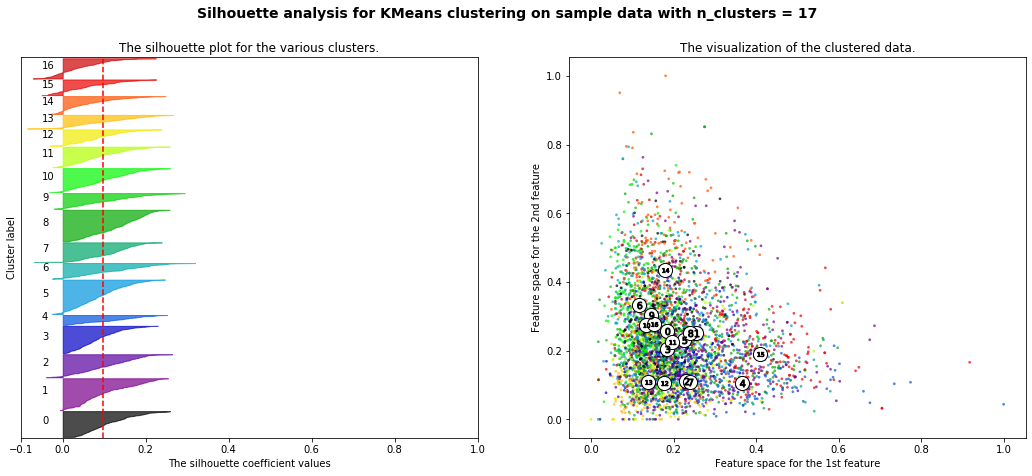

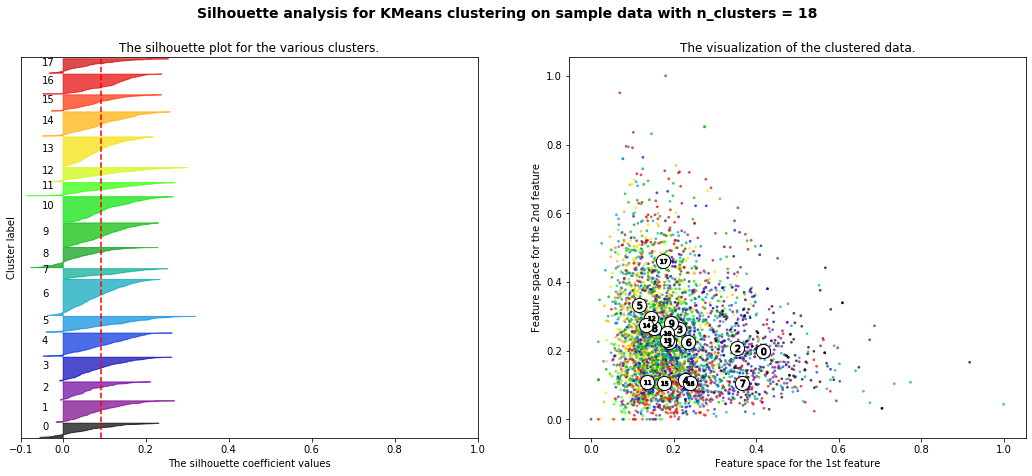

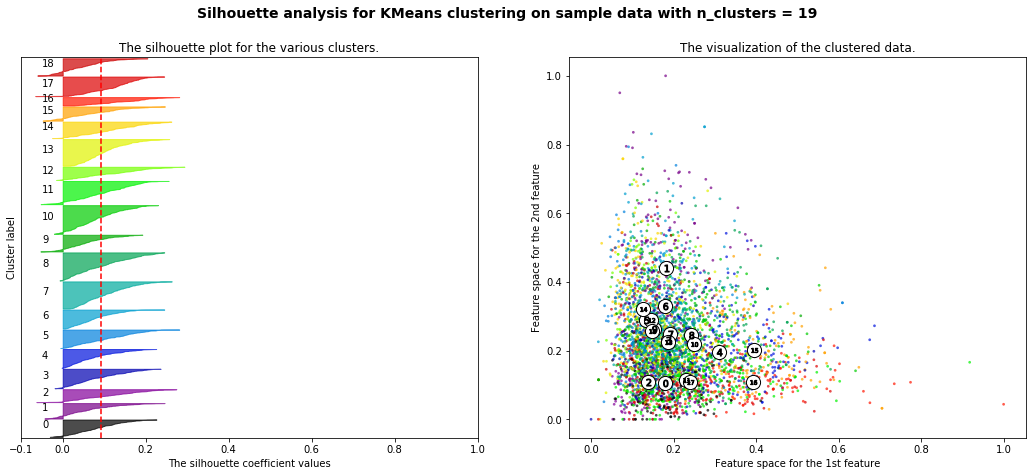

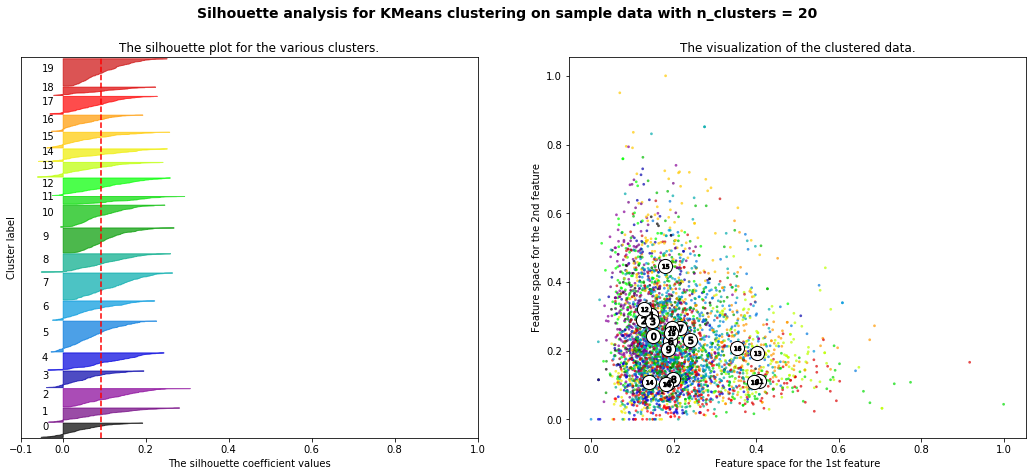

In [14]:
# visualize on silhouette_score of different # of clusters

range_n_clusters = range(6,21)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=50, random_state=10)
    cluster_labels = kmeans.fit_predict(df_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_std[:, 0], df_std[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [15]:
# run Elbow plot to decide the best number of K
Sum_of_squared_distances = []
range_n_clusters = range(6,21)
for n_clusters in range_n_clusters:
    km = KMeans(init='k-means++', n_clusters = n_clusters, n_init=50, random_state=10)
    km = km.fit(df_std)
    Sum_of_squared_distances.append(km.inertia_)

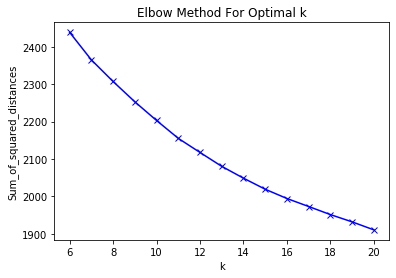

In [17]:
# plot the elbow
plt.plot(range_n_clusters, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
# even though # of clusters = 6 gives me the highest silhouette score and inertia, I feel like it's not enough to parse all the songs
# so I choose the # of clusters as 8, so it gives me reasonable # of song genres (in this case, the # of clusters),
# as well as reasonable silhouette score (the seperation of cluster) comparing to others
n_cluster_val = 8
clusterer_kmeans = KMeans(init='k-means++', n_clusters = n_cluster_val, n_init=50, random_state=10)
cluster_labels_kmeans = clusterer_kmeans.fit_predict(df_std)
silhouette_avg = silhouette_score(df_std, cluster_labels_kmeans)
print("For n_clusters = {},the average silhouette_score is: {} ".format(n_cluster_val, silhouette_avg))

For n_clusters = 8,the average silhouette_score is: 0.12186488770473726 


In [19]:
# assign clusters back to the dataframe
# so for we have 8 cluster lables attached to all songs
df['kmeans_cluster'] = cluster_labels_kmeans

In [20]:
# cluster_labels_kmeans

In [56]:
# color_dict = {0:'limegreen', 1:'yellow', 2:'purple', 3:'crimson', 4:'orange',
#             5:'cyan', 6:'greenyellow', 7:'darkturquoise'}

In [57]:
# color_labels = [color_dict[i] for i in cluster_labels_kmeans]

In [21]:
df.head()

lyrics  num_syllables    pos  \
0  Mona Lisa, Mona Lisa, men have named you\nYou'...          189.0  0.199   
1  I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...          270.9  0.224   
2  I was dancing with my darling to the Tennessee...          174.6  0.351   
3  Each time I hold someone new\nMy arms grow col...          135.9  0.231   
4  Unfortunately, we are not licensed to display ...           46.8  0.079   

   year  fog_index  flesch_index  num_words  num_lines               title  \
0  1950        5.2         88.74        145         17           Mona Lisa   
1  1950        4.4         82.31        189         31    I Wanna Be Loved   
2  1950        5.2         88.74        138         16     Tennessee Waltz   
3  1950        4.4         99.23        117         18  I'll Never Be Free   
4  1950        6.0         69.79         32          3         All My Love   

   f_k_grade                artist  difficult_words  num_dupes    neg    neu  \
0        2.9         Nat King Cole               13         10  0.155  0.646   
1        3.3       Andrews Sisters               40         32  0.036  0.740   
2        2.9            Patti Page                5         10  0.053  0.596   
3        0.9  Tennessee Ernie Ford               10          3  0.167  0.602   
4        6.0            Patti Page                9          0  0.070  0.850   

   compound                      id  danceability  energy  key  loudness  \
0    0.8443  3k5ycyXX5qsCjLd7R2vphp         0.214   0.194    1   -15.636   
1    0.9897  4UY81WrDU3jTROGaKuz4uZ         0.358   0.085    8   -13.664   
2    0.9948  6DKt9vMnMN0HmlnK3EAHRQ         0.424   0.163    3   -15.899   
3    0.8842  0KnD456yC5JuweN932Ems3         0.697   0.182    7   -12.586   
4    0.0772  05sXHTLqIpwywbpui1JT4o         0.631   0.273    8   -11.538   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0325         0.903          0.000001     0.107    0.339   
1     1       0.0389         0.939          0.000000     0.160    0.181   
2     1       0.0276         0.784          0.000671     0.116    0.294   
3     1       0.0357         0.780          0.000000     0.126    0.474   
4     1       0.0408         0.801          0.000000     0.158    0.633   

     tempo  duration_ms  time_signature                                   uri  \
0   86.198     207573.0               3  spotify:track:3k5ycyXX5qsCjLd7R2vphp   
1  170.869     198027.0               5  spotify:track:4UY81WrDU3jTROGaKuz4uZ   
2   86.335     182733.0               3  spotify:track:6DKt9vMnMN0HmlnK3EAHRQ   
3   82.184     158000.0               3  spotify:track:0KnD456yC5JuweN932Ems3   
4  123.314     190933.0               4  spotify:track:05sXHTLqIpwywbpui1JT4o   

                                        analysis_url artist_with_features  \
0  https://api.spotify.com/v1/audio-analysis/3k5y...                  NaN   
1  https://api.spotify.com/v1/audio-analysis/4UY8...       Gordon Jenkins   
2  https://api.spotify.com/v1/audio-analysis/6DKt...                  NaN   
3  https://api.spotify.com/v1/audio-analysis/0KnD...            Kay Starr   
4  https://api.spotify.com/v1/audio-analysis/05sX...                  NaN   

  year_bin                                              image       cluster  \
0      50s  https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...  String Lover   
1      50s  https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...  String Lover   
2      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   
3      50s  https://i.scdn.co/image/4bd427bb9181914d0fa448...  String Lover   
4      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   

   Gender                                               tags  \
0    male  [american, death by lung cancer, easy listenin...   
1   Group                                  [andrews sisters]   
2  female                                     [country, pop]   
3    male                [death by liv

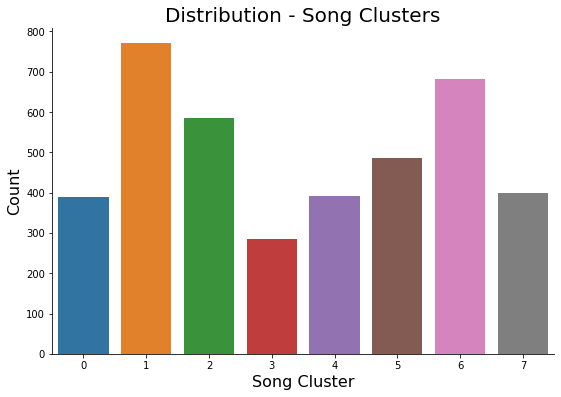

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.countplot(x = 'kmeans_cluster', data = df)
ax.set_xlabel('Song Cluster', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Distribution - Song Clusters', fontsize=20)
sns.despine()

In [23]:
df.loc[df['kmeans_cluster']==5].sample(10)

lyrics  num_syllables    pos  \
167   Holy smoke\nA land sakes alive!\nI never thoug...          197.1  0.066   
1792  Everybody's saying silly things \nWithout know...          673.2  0.204   
3426  I got my sight set on you\nAnd I'm ready to ai...          400.5  0.110   
3504  Day and night (what, what)\nI toss and turn, I...          565.2  0.186   
2796  \nI like this right here, yeah\nBad Boy, and w...          369.0  0.214   
2308  That old dog has chained you up, alright\nGive...          622.8  0.264   
2189  We had a life, we had a love\nBut you don't kn...          440.1  0.137   
372   spoken: \n"You broke his heart and made him cr...          242.1  0.112   
3387  Break it off\nBreakin' it off\nAnd settin' it ...          841.5  0.063   
3713  Let's run away from these lies\nBack to yester...          379.8  0.218   

      year  fog_index  flesch_index  num_words  num_lines  \
167   1958        4.0        108.70        173         30   
1792  1985        4.0        108.70        597        104   
3426  2008        4.0        108.70        357         66   
3504  2009        5.6        104.64        513         55   
2796  1999        4.0        100.24        316         60   
2308  1992        4.8         98.21        519         65   
2189  1990        4.8        106.67        385         52   
372   1963        4.8         98.21        202         26   
3387  2007        4.8        106.67        748        105   
3713  2011        4.4         99.23        318         51   

                                        title  f_k_grade             artist  \
167                               I Got Stung       -0.7      Elvis Presley   
1792                              Cool It Now       -0.7        New Edition   
3426                            See You Again       -0.7        Miley Cyrus   
3504                             Day 'n' Nite        0.9           Kid Cudi   
2796                           All Night Long        0.5        Faith Evans   
2308             Damn I Wish I Was Your Lover        1.3  Sophie B. Hawkins   
2189  Something Happened On The Way To Heaven        0.1       Phil Collins   
372                       Foolish Little Girl        1.3          Shirelles   
3387                             Break It Off        0.1            Rihanna   
3713                          Please Don't Go        0.9        Mike Posner   

      difficult_words  num_dupes    neg    neu  compound  \
167                18          7  0.039  0.895    0.3378   
1792               23         58  0.046  0.750    0.9986   
3426               22         37  0.051  0.839    0.9692   
3504               27         34  0.135  0.679    0.9920   
2796               27         30  0.077  0.709    0.9931   
2308               44         37  0.105  0.631    0.9984   
2189               12         30  0.109  0.754    0.9557   
372                12         13  0.089  0.799    0.7177   
3387               56         56  0.033  0.904    0.9696   
3713               15         34  0.024  0.758    0.9968   

                          id  danceability  energy  key  loudness  mode  \
167   0IDFXLMABcj61OKI3L05A0         0.731   0.832   10   -10.336     0   
1792  1r50OO2qVHH0vZ3gqPdTV0         0.865   0.614   10    -9.222     0   
3426  2TUN6qyhaEpmBzQIojXJGK         0.693   0.916    9    -5.076     0   
3504  60PAzFNW3vAiAiVK6DRJfB         0.880   0.443   11    -6.359     0   
2796  0Rv1ICkeAao0Yx85xpJ29k         0.713   0.779   11    -4.726     0   
2308  7kmfQ2QHwGqRCxVHDv5mzo         0.546   0.781   11    -9.439     0   
2189  4ziqqoW1o3P5EhNqK6CPb1         0.656   0.880    5    -4.137     0   
372   093adSf9ll30BEpggrfask         0.739   0.743    7    -5.926     0   
3387  4mYvuqbaWcIP3RNn1mkOYP         0.899   0.724   10    -5.757     0   
3713  3wkKkFAtYSTRwqOydW6T0I         0.697   0.878    4    -3.928     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
167        0.0540       0.90100          0.5300

In [24]:
# wanted to checkout songs within the same cluster manually to see if the clusters are meaningful
df.loc[df['kmeans_cluster']==5].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     485.000000  485.000000   485.000000  485.000000    485.000000   
mean      459.642062    0.172874  1993.061856    4.611959     98.776639   
std       192.122712    0.092518    14.523431    0.567091      8.087624   
min        45.900000    0.012000  1951.000000    3.200000     41.020000   
25%       320.400000    0.110000  1983.000000    4.400000     97.200000   
50%       422.100000    0.154000  1995.000000    4.400000     99.230000   
75%       588.600000    0.217000  2005.000000    4.800000    105.660000   
max      1239.300000    0.585000  2015.000000    7.200000    115.130000   

         num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count   485.000000  485.000000  485.000000        485.00000  485.000000   
mean    386.094845   55.527835    1.099175         27.22268   31.734021   
std     166.551791   22.202155    1.181118         17.79265   18.718262   
min      40.000000    8.000000   -1.100000          1.00000    1.000000   
25%     258.000000   39.000000    0.500000         15.00000   18.000000   
50%     356.000000   52.000000    0.900000         22.00000   29.000000   
75%     492.000000   70.000000    1.700000         33.00000   41.000000   
max    1021.000000  181.000000    8.800000        107.00000  126.000000   

              neg         neu    compound  danceability      energy  \
count  485.000000  485.000000  485.000000    485.000000  485.000000   
mean     0.051101    0.776052    0.923535      0.695779    0.693466   
std      0.035822    0.098656    0.170907      0.127374    0.160812   
min      0.000000    0.395000   -0.156600      0.269000    0.089900   
25%      0.026000    0.721000    0.945600      0.622000    0.576000   
50%      0.046000    0.788000    0.988000      0.706000    0.711000   
75%      0.070000    0.843000    0.996400      0.784000    0.817000   
max      0.201000    0.988000    0.999800      0.984000    0.982000   

              key    loudness   mode  speechiness  acousticness  \
count  485.000000  485.000000  485.0   485.000000    485.000000   
mean     8.492784   -7.543332    0.0     0.084524      0.153965   
std      2.251365    3.304753    0.0     0.080979      0.177620   
min      4.000000  -21.976000    0.0     0.022500      0.000049   
25%      7.000000   -9.445000    0.0     0.038000      0.029000   
50%      9.000000   -6.884000    0.0     0.050600      0.083300   
75%     10.000000   -5.076000    0.0     0.090400      0.229000   
max     11.000000   -1.915000    0.0     0.484000      0.903000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        485.000000  485.000000  485.000000  485.000000     485.000000   
mean           0.019602    0.177823    0.710924  117.722885  246373.956701   
std            0.091376    0.150777    0.202724   26.551304   63182.067515   
min            0.000000    0.017000    0.077300   60.019000  106627.000000   
25%            0.000000    0.076400    0.585000   98.018000  214773.000000   
50%            0.000005    0.120000    0.759000  116.047000  237000.000000   
75%            0.000415    0.234000    0.880000  129.077000  268067.000000   
max            0.800000    0.963000    0.978000  208.571000  830400.000000   

       time_signature      topic1      topic2      topic3      topic4  \
count      485.000000  485.000000  485.000000  485.000000  485.000000   
mean         3.985567    0.168154    0.107160    0.065364    0.075992   
std          0.244353    0.146950    0.096172    0.099487    0.086266   
min          1.000000    0.000000    0.000000    0.000000    0.000000   
25%          4.000000    0.057092    0.037527    0.000000    0.021900   
50%          4.000000    0.125959    0.081483    0.025898    0.049273   
75%          4.000000    0.232377    0.140490    0.078434    0.088032   
max          5.000000    0.704160    0.777668    0.737052    0.558303   

           topic5      topic6      topic7      top

In [25]:
df.loc[df['kmeans_cluster']==1].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     771.000000  771.000000   771.000000  771.000000    771.000000   
mean      407.354475    0.169619  1989.914397    4.656291     98.281012   
std       171.689948    0.085441    16.051797    0.567058      8.038354   
min        46.800000    0.015000  1955.000000    3.600000     57.940000   
25%       283.500000    0.108000  1977.000000    4.400000     95.170000   
50%       369.900000    0.151000  1990.000000    4.400000     99.230000   
75%       495.450000    0.213000  2005.000000    4.800000    104.640000   
max      1157.400000    0.543000  2015.000000    7.200000    118.180000   

        num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count  771.000000  771.000000  771.000000       771.000000  771.000000   
mean   341.128405   48.754864    1.198184        23.105058   27.778210   
std    147.851884   20.569069    1.210708        14.056310   17.109315   
min     32.000000    3.000000   -2.200000         1.000000    0.000000   
25%    234.500000   34.000000    0.500000        14.000000   16.000000   
50%    308.000000   46.000000    0.900000        20.000000   24.000000   
75%    413.000000   60.000000    1.700000        28.000000   36.000000   
max    942.000000  148.000000    6.400000       112.000000  138.000000   

              neg         neu    compound  danceability      energy  \
count  771.000000  771.000000  771.000000    771.000000  771.000000   
mean     0.052690    0.777681    0.914756      0.631617    0.704752   
std      0.040157    0.096817    0.170260      0.129785    0.143779   
min      0.000000    0.375000   -0.027900      0.145000    0.298000   
25%      0.024000    0.720000    0.937000      0.543000    0.597500   
50%      0.044000    0.792000    0.982500      0.643000    0.714000   
75%      0.074000    0.848000    0.995750      0.717500    0.820500   
max      0.269000    0.985000    0.999800      0.978000    0.996000   

              key    loudness   mode  speechiness  acousticness  \
count  771.000000  771.000000  771.0   771.000000    771.000000   
mean     7.762646   -7.457384    1.0     0.066280      0.162853   
std      1.830323    2.900252    0.0     0.065362      0.171339   
min      5.000000  -18.168000    1.0     0.022500      0.000046   
25%      7.000000   -9.388500    1.0     0.032100      0.029350   
50%      8.000000   -6.970000    1.0     0.043300      0.104000   
75%      9.000000   -5.149000    1.0     0.064850      0.248000   
max     11.000000   -2.266000    1.0     0.576000      0.847000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        771.000000  771.000000  771.000000  771.000000     771.000000   
mean           0.015657    0.187671    0.675796  120.258778  232708.315175   
std            0.082261    0.157179    0.216676   27.090933   55235.048110   
min            0.000000    0.031100    0.082400   51.316000   91373.000000   
25%            0.000000    0.090350    0.518500   99.114000  198080.000000   
50%            0.000004    0.131000    0.711000  118.745000  230280.000000   
75%            0.000276    0.237500    0.864000  136.821500  262366.500000   
max            0.870000    0.991000    0.980000  204.368000  568293.000000   

       time_signature      topic1      topic2      topic3      topic4  \
count      771.000000  771.000000  771.000000  771.000000  771.000000   
mean         3.987030    0.161100    0.102551    0.065396    0.094669   
std          0.168532    0.139047    0.092528    0.105708    0.102653   
min          3.000000    0.000000    0.000000    0.000000    0.000000   
25%          4.000000    0.048453    0.040303    0.000000    0.028450   
50%          4.000000    0.118554    0.079254    0.022865    0.060950   
75%          4.000000    0.234587    0.127339    0.076798    0.114550   
max          5.000000    0.749003    0.676380    0.689601    0.713456   

           topic5      topic6      topic7      topic8  kmea

In [26]:
df_cluster.head()

num_syllables    pos  fog_index  flesch_index  num_words  num_lines  \
0          189.0  0.199        5.2         88.74        145         17   
1          270.9  0.224        4.4         82.31        189         31   
2          174.6  0.351        5.2         88.74        138         16   
3          135.9  0.231        4.4         99.23        117         18   
4           46.8  0.079        6.0         69.79         32          3   

   f_k_grade  difficult_words  num_dupes    neg    neu  compound  \
0        2.9               13         10  0.155  0.646    0.8443   
1        3.3               40         32  0.036  0.740    0.9897   
2        2.9                5         10  0.053  0.596    0.9948   
3        0.9               10          3  0.167  0.602    0.8842   
4        6.0                9          0  0.070  0.850    0.0772   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.214   0.194    1   -15.636     1       0.0325         0.903   
1         0.358   0.085    8   -13.664     1       0.0389         0.939   
2         0.424   0.163    3   -15.899     1       0.0276         0.784   
3         0.697   0.182    7   -12.586     1       0.0357         0.780   
4         0.631   0.273    8   -11.538     1       0.0408         0.801   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000001     0.107    0.339   86.198     207573.0               3   
1          0.000000     0.160    0.181  170.869     198027.0               5   
2          0.000671     0.116    0.294   86.335     182733.0               3   
3          0.000000     0.126    0.474   82.184     158000.0               3   
4          0.000000     0.158    0.633  123.314     190933.0               4   

     topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.614542  0.019553  0.000000  0.060368  0.030243  0.046048  0.162760   
1  0.202711  0.021917  0.057178  0.017918  0.408767  0.011015  0.139941   
2  0.031163  0.095947  0.014771  0.022918  0.018256  0.014069  0.770812   
3  0.374377  0.030568  0.013513  0.025441  0.016758  0.013217  0.497348   
4  0.124803  0.054699  0.030568  0.047473  0.097716  0.419295  0.160738   

     topic8  
0  0.056962  
1  0.140553  
2  0.032064  
3  0.028778  
4  0.064708

In [27]:
df_pca_cluster = df.drop(['lyrics', 'year','title', 'artist','id', 'uri', 'analysis_url', 'artist_with_features', 'year_bin','image', 'cluster', 'Gender', 'tags', 'lyric', 'lyrics_data'], axis = 1)
df_pca_cluster.head()

num_syllables    pos  fog_index  flesch_index  num_words  num_lines  \
0          189.0  0.199        5.2         88.74        145         17   
1          270.9  0.224        4.4         82.31        189         31   
2          174.6  0.351        5.2         88.74        138         16   
3          135.9  0.231        4.4         99.23        117         18   
4           46.8  0.079        6.0         69.79         32          3   

   f_k_grade  difficult_words  num_dupes    neg    neu  compound  \
0        2.9               13         10  0.155  0.646    0.8443   
1        3.3               40         32  0.036  0.740    0.9897   
2        2.9                5         10  0.053  0.596    0.9948   
3        0.9               10          3  0.167  0.602    0.8842   
4        6.0                9          0  0.070  0.850    0.0772   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.214   0.194    1   -15.636     1       0.0325         0.903   
1         0.358   0.085    8   -13.664     1       0.0389         0.939   
2         0.424   0.163    3   -15.899     1       0.0276         0.784   
3         0.697   0.182    7   -12.586     1       0.0357         0.780   
4         0.631   0.273    8   -11.538     1       0.0408         0.801   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000001     0.107    0.339   86.198     207573.0               3   
1          0.000000     0.160    0.181  170.869     198027.0               5   
2          0.000671     0.116    0.294   86.335     182733.0               3   
3          0.000000     0.126    0.474   82.184     158000.0               3   
4          0.000000     0.158    0.633  123.314     190933.0               4   

     topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.614542  0.019553  0.000000  0.060368  0.030243  0.046048  0.162760   
1  0.202711  0.021917  0.057178  0.017918  0.408767  0.011015  0.139941   
2  0.031163  0.095947  0.014771  0.022918  0.018256  0.014069  0.770812   
3  0.374377  0.030568  0.013513  0.025441  0.016758  0.013217  0.497348   
4  0.124803  0.054699  0.030568  0.047473  0.097716  0.419295  0.160738   

     topic8  kmeans_cluster  
0  0.056962               7  
1  0.140553               4  
2  0.032064               7  
3  0.028778               4  
4  0.064708               4

In [28]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_cluster)

In [29]:
array_cluster = df_pca_cluster['kmeans_cluster'].values
array_cluster.shape

(3987,)

In [30]:
array_cluster = array_cluster.reshape(-1,1)
array_cluster.shape

(3987, 1)

In [31]:
abc = np.append(df_pca,array_cluster,axis=1)
abc_pca = pd.DataFrame(abc)
abc_pca

0           1          2    3
0    -25192.670518 -232.319757 -32.944427  7.0
1    -34738.532389 -125.451666  53.330306  4.0
2    -50032.668647 -213.660987 -33.520263  7.0
3    -74765.704133 -221.951165 -38.969538  4.0
4    -41832.908776 -391.519153   3.501333  4.0
5    -58725.174933  148.293108  11.411063  7.0
6    -72015.418096  -18.074484 -11.877072  7.0
...            ...         ...        ...  ...
3980 -12924.745947  424.263259 -24.135605  6.0
3981 -19552.081900  187.513813 -14.223000  2.0
3982 -33311.965029  281.204461   4.767558  6.0
3983 -24632.709019 -259.965386   0.882501  0.0
3984 -18039.603563 -188.123000  20.009796  5.0
3985  -6165.325466    2.664464   3.434938  2.0
3986 -20125.297002   33.518044   2.196215  5.0

[3987 rows x 4 columns]

In [32]:
abc_pca.columns = ['pca_1','pca_2','pca_3','cluster']
abc_pca.columns

Index(['pca_1', 'pca_2', 'pca_3', 'cluster'], dtype='object')

In [33]:
fig = px.scatter_3d(abc_pca,x='pca_1', y='pca_2', z='pca_3',
             color='cluster')
fig.show()

##### <font color='black'>DBSCAN Clustering</font>

In [72]:
# find the optimal eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)

Text(0.5, 1.0, 'Plot for Optimal EPS')

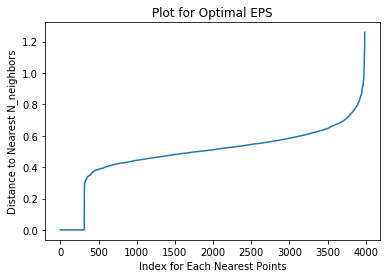

In [73]:
# plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Index for Each Nearest Points')
plt.ylabel('Distance to Nearest N_neighbors')
plt.title('Plot for Optimal EPS')

In [74]:
# since 0.7 is at the point of maximum curvature, so I will choose my eps = 0.7
# run for loop with range of min_samples, compare which value gives the highest silhouette score, given fixed eps as 0.7
silhouette_score_bucket = []
range_min_samples = range(2,25)
for min_samples in range_min_samples:
    dbsc = DBSCAN(eps=0.7, min_samples = min_samples, metric='euclidean')
    dbsc.fit(df_std)
    clusters = dbsc.labels_
    silhouette_avg = silhouette_score(df_std, clusters)
    silhouette_score_bucket.append(silhouette_avg)
    print("For min_samples = {},the average silhouette_score is: {} ".format(min_samples, silhouette_avg))

For min_samples = 2,the average silhouette_score is: -0.09382787525526039 
For min_samples = 3,the average silhouette_score is: 0.17312658349772356 
For min_samples = 4,the average silhouette_score is: 0.1951851675265337 
For min_samples = 5,the average silhouette_score is: 0.19385371747768554 
For min_samples = 6,the average silhouette_score is: 0.14284230719380206 
For min_samples = 7,the average silhouette_score is: 0.19082491464946316 
For min_samples = 8,the average silhouette_score is: 0.1896001878959189 
For min_samples = 9,the average silhouette_score is: 0.1875843363224062 
For min_samples = 10,the average silhouette_score is: 0.1864368894808019 
For min_samples = 11,the average silhouette_score is: 0.18543531059903648 
For min_samples = 12,the average silhouette_score is: 0.13339997183341998 
For min_samples = 13,the average silhouette_score is: 0.13274592967714452 
For min_samples = 14,the average silhouette_score is: 0.1318033118169503 
For min_samples = 15,the average silh

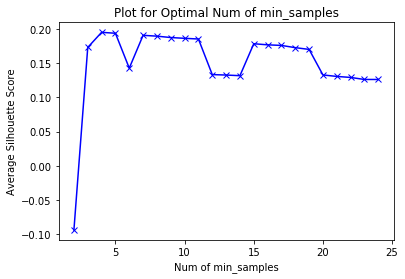

In [76]:
# plot avg of silhoutte score of different value of min_samples, given optimal eps is 0.7
plt.plot(range_min_samples, silhouette_score_bucket, 'bx-')
plt.xlabel('Num of min_samples')
plt.ylabel('Average Silhouette Score')
plt.title('Plot for Optimal Num of min_samples')
plt.show()

In [109]:
# since 0.7 is at the point of maximum curvature, so I will choose my eps = 0.7
# when min_samples = 5, gives me the best silhouette score
# metrics for DBSCAN could be 'manhattan', 'euclidean', or 'cosine', I will choose euclidean for now
dbsc = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')
dbsc.fit(df_std)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

clusters = dbsc.labels_
core_samples = np.zeros_like(clusters, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

print('Silhoutte Coefficient: %0.3f' % metrics.silhouette_score(df_std, labels))

Silhoutte Coefficient: 0.194


In [110]:
# see how many clusters that dbscan gives me
n_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_dbscan

2

In [111]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

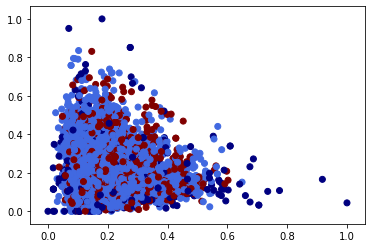

In [112]:
plt.scatter(df_std[:,0], df_std[:,1], c=vectorizer(clusters))

##### <font color='red'>Wrap up Visualization</font>
In previous DBSCAN step, I ran different metrics (mahantan gives me similar results compare with euclidean distance, while cosine only gives one huge cluster), and different parameters (when eps is really small, the silhoutte score can drop below 0, which means obs assigned to the wrong cluster). So when I use optimal eps(0.7) and optimal min_samples (5), the best silhouette score is 0.19. However, it was only seperate into 2 clusters. Since DBSCAN only gives me 2 clusters, so I decided to use clusters from K means. 

In [ ]:
# rename topics
df = df.rename(columns={'topic1': 'life', 'topic2': 'romance','topic3':'party','topic4':'family/happiness',
                       'topic5':'sexsual oriented','topic6': 'clubbing', 'topic7': 'sadness', 'topic8':'violence'})

In [143]:
# for each of song, we have proportions of topics applied
# to visualize the topics (from topic modeling) and song genres (from clustering), 
# I want to find the topics which ranks the highest proportion among all topics
# so to find the 'dominant' topic of each song and then visualize how the 'dominant' topics distributed for each song genre
df['dominant lyric topic'] = df[['life', 'romance', 'party', 'family/happiness',
                                 'sexsual oriented', 'clubbing', 'sadness', 'violence']].idxmax(axis = 1)

In [144]:
# to validate if all 'dominant lyric topic' are assigned for each song correctly
# seems like I did it!!!!
df.head()

lyrics  num_syllables    pos  \
0  Mona Lisa, Mona Lisa, men have named you\nYou'...          189.0  0.199   
1  I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...          270.9  0.224   
2  I was dancing with my darling to the Tennessee...          174.6  0.351   
3  Each time I hold someone new\nMy arms grow col...          135.9  0.231   
4  Unfortunately, we are not licensed to display ...           46.8  0.079   

   year  fog_index  flesch_index  num_words  num_lines               title  \
0  1950        5.2         88.74        145         17           Mona Lisa   
1  1950        4.4         82.31        189         31    I Wanna Be Loved   
2  1950        5.2         88.74        138         16     Tennessee Waltz   
3  1950        4.4         99.23        117         18  I'll Never Be Free   
4  1950        6.0         69.79         32          3         All My Love   

   f_k_grade                artist  difficult_words  num_dupes    neg    neu  \
0        2.9         Nat King Cole               13         10  0.155  0.646   
1        3.3       Andrews Sisters               40         32  0.036  0.740   
2        2.9            Patti Page                5         10  0.053  0.596   
3        0.9  Tennessee Ernie Ford               10          3  0.167  0.602   
4        6.0            Patti Page                9          0  0.070  0.850   

   compound                      id  danceability  energy  key  loudness  \
0    0.8443  3k5ycyXX5qsCjLd7R2vphp         0.214   0.194    1   -15.636   
1    0.9897  4UY81WrDU3jTROGaKuz4uZ         0.358   0.085    8   -13.664   
2    0.9948  6DKt9vMnMN0HmlnK3EAHRQ         0.424   0.163    3   -15.899   
3    0.8842  0KnD456yC5JuweN932Ems3         0.697   0.182    7   -12.586   
4    0.0772  05sXHTLqIpwywbpui1JT4o         0.631   0.273    8   -11.538   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0325         0.903          0.000001     0.107    0.339   
1     1       0.0389         0.939          0.000000     0.160    0.181   
2     1       0.0276         0.784          0.000671     0.116    0.294   
3     1       0.0357         0.780          0.000000     0.126    0.474   
4     1       0.0408         0.801          0.000000     0.158    0.633   

     tempo  duration_ms  time_signature                                   uri  \
0   86.198     207573.0               3  spotify:track:3k5ycyXX5qsCjLd7R2vphp   
1  170.869     198027.0               5  spotify:track:4UY81WrDU3jTROGaKuz4uZ   
2   86.335     182733.0               3  spotify:track:6DKt9vMnMN0HmlnK3EAHRQ   
3   82.184     158000.0               3  spotify:track:0KnD456yC5JuweN932Ems3   
4  123.314     190933.0               4  spotify:track:05sXHTLqIpwywbpui1JT4o   

                                        analysis_url artist_with_features  \
0  https://api.spotify.com/v1/audio-analysis/3k5y...                  NaN   
1  https://api.spotify.com/v1/audio-analysis/4UY8...       Gordon Jenkins   
2  https://api.spotify.com/v1/audio-analysis/6DKt...                  NaN   
3  https://api.spotify.com/v1/audio-analysis/0KnD...            Kay Starr   
4  https://api.spotify.com/v1/audio-analysis/05sX...                  NaN   

  year_bin                                              image       cluster  \
0      50s  https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...  String Lover   
1      50s  https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...  String Lover   
2      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   
3      50s  https://i.scdn.co/image/4bd427bb9181914d0fa448...  String Lover   
4      50s  https://i.scdn.co/image/353b05113b1a140d64d83d...  String Lover   

   Gender                                               tags  \
0    male  [american, death by lung cancer, easy listenin...   
1   Group                                  [andrews sisters]   
2  female                                     [country, pop]   
3    male                [death by liv

In [137]:
df.columns

Index(['lyrics', 'num_syllables', 'pos', 'year', 'fog_index', 'flesch_index',
       'num_words', 'num_lines', 'title', 'f_k_grade', 'artist',
       'difficult_words', 'num_dupes', 'neg', 'neu', 'compound', 'id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'uri', 'analysis_url',
       'artist_with_features', 'year_bin', 'image', 'cluster', 'Gender',
       'tags', 'lyric', 'lyrics_data', 'topic1', 'topic2', 'topic3', 'topic4',
       'topic5', 'topic6', 'topic7', 'topic8', 'kmeans_cluster',
       'dominant lyric topic'],
      dtype='object')

In [145]:
# to better visualize the results and more important, I want it to be interactive,
# I need to export my dataframe into csv file and then visualize my results with tableau
df.to_csv('tableau_vis_file.csv', index = None, header=True)

In [163]:
df.loc[df['kmeans_cluster']==0].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count      388.00000  388.000000   388.000000  388.000000    388.000000   
mean       367.65000    0.187497  1987.317010    4.554639     98.551649   
std        163.17987    0.092051    17.092393    0.547113      8.071306   
min         46.80000    0.026000  1950.000000    3.200000     66.400000   
25%        247.50000    0.119750  1974.000000    4.000000     92.545000   
50%        344.70000    0.170000  1987.000000    4.400000     99.230000   
75%        441.90000    0.254250  2002.000000    4.800000    105.660000   
max       1049.40000    0.524000  2015.000000    6.800000    117.160000   

        num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count  388.000000  388.000000  388.000000       388.000000  388.000000   
mean   308.335052   44.997423    1.096392        20.757732   24.662371   
std    141.910374   19.104297    1.195291        13.209818   14.940430   
min     32.000000    3.000000   -1.800000         2.000000    0.000000   
25%    209.500000   32.000000    0.500000        12.000000   14.000000   
50%    285.000000   42.000000    0.900000        16.000000   22.000000   
75%    375.500000   54.000000    1.700000        26.000000   32.000000   
max    854.000000  116.000000    6.000000        90.000000   82.000000   

              neg         neu    compound  danceability      energy  \
count  388.000000  388.000000  388.000000    388.000000  388.000000   
mean     0.055314    0.757191    0.903013      0.605657    0.606423   
std      0.043284    0.100600    0.213687      0.152587    0.201130   
min      0.000000    0.423000   -0.319400      0.159000    0.101000   
25%      0.022750    0.683000    0.936650      0.518000    0.460750   
50%      0.049000    0.769000    0.984400      0.628500    0.621500   
75%      0.073000    0.835250    0.995700      0.714250    0.745000   
max      0.233000    0.970000    0.999800      0.951000    0.988000   

              key    loudness   mode  speechiness  acousticness  \
count  388.000000  388.000000  388.0   388.000000    388.000000   
mean     2.847938   -8.638515    0.0     0.061847      0.302162   
std      2.261936    3.541238    0.0     0.057512      0.270640   
min      0.000000  -20.710000    0.0     0.022700      0.000074   
25%      1.000000  -10.801000    0.0     0.032200      0.056900   
50%      2.000000   -8.393000    0.0     0.040800      0.238000   
75%      5.000000   -5.862500    0.0     0.063500      0.497000   
max     10.000000   -1.185000    0.0     0.410000      0.970000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        388.000000  388.000000  388.000000  388.000000     388.000000   
mean           0.023206    0.183575    0.570373  119.026925  241993.976804   
std            0.108356    0.157451    0.243605   28.845058   65244.536126   
min            0.000000    0.018200    0.046500   62.693000  118413.000000   
25%            0.000000    0.086625    0.391750   98.859000  202574.000000   
50%            0.000005    0.126000    0.592500  118.960000  233300.000000   
75%            0.000542    0.230500    0.761250  132.022250  269756.500000   
max            0.971000    0.938000    0.977000  207.424000  571440.000000   

       time_signature        life     romance       party  family/happiness  \
count      388.000000  388.000000  388.000000  388.000000        388.000000   
mean         3.953608    0.214960    0.102798    0.047785          0.086559   
std          0.264941    0.154111    0.105602    0.076225          0.090960   
min          1.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.091418    0.036499    0.000000          0.022824   
50%          4.000000    0.174916    0.068294    0.018302          0.055253   
75%          4.000000    0.316553    0.127328    0.060687          0.123744   
max          5.000000    0.790595    0.849658    0.543056          0.488623   

     

In [171]:
# 'kmeans_cluster']==0 pop
df.loc[df['kmeans_cluster']==0].sample(20)

lyrics  num_syllables    pos  \
2971  Ja Rule:\nRight back at ya, it's the world's m...          369.0  0.315   
710   How can people be so heartless\nHow can people...          218.7  0.336   
3383  Paper bags and plastic hearts\nAll our belongi...          306.9  0.170   
3587  Aye, when I give you these keys homeboy don't ...          740.7  0.100   
530   When I said, I needed you\nYou said you would ...          208.8  0.181   
2002  Ooh baby, do you know what that's worth?\nOoh,...          377.1  0.305   
342   Love me warm and tender, dear\nLove me warm li...          191.7  0.470   
...                                                 ...            ...    ...   
122   If you're fond of sand dunes and salty air\nQu...          134.1  0.213   
4004  I've got fire for a heart\nI'm not scared of t...          449.1  0.121   
1235  On a morning from a Bogart movie\nIn a country...          277.2  0.069   
481   We've already said goodbye\nSince you've got t...          198.9  0.225   
2439  Ooo, baby, I love your way, everyday\nOoo, bab...          290.7  0.275   
1374  I'm so glad that I met you, baby\nAnd I'm so p...          348.3  0.176   
335   When Liberty Valance rode to town, the womenfo...          353.7  0.238   

      year  fog_index  flesch_index  num_words  num_lines  \
2971  2002        4.8         98.21        307         42   
710   1969        4.0         91.78        174         33   
3383  2007        4.0        100.24        251         46   
3587  2010        4.8        106.67        657         85   
530   1966        4.0         91.78        167         29   
2002  1988        4.4         99.23        310         45   
342   1962        5.2        105.66        168         20   
...    ...        ...           ...        ...        ...   
122   1957        5.2         97.20        109         13   
4004  2015        4.8         98.21        363         48   
1235  1977        4.8         98.21        227         31   
481   1965        4.8        106.67        178         25   
2439  1994        4.4         90.77        225         34   
1374  1979        5.2         97.20        289         33   
335   1962        6.0         95.17        287         27   

                                  title  f_k_grade             artist  \
2971                              Happy        1.3            Ashanti   
710                     Easy To Be Hard        1.7    Three Dog Night   
3383                   The Great Escape        0.5    Boys Like Girls   
3587                            Say Aah        0.1         Trey Songz   
530   You Don't Have To Say You Love Me        1.7  Dusty Springfield   
2002         Heaven Is A Place On Earth        0.9   Belinda Carlisle   
342             Love Me Warm And Tender        0.5          Paul Anka   
...                                 ...        ...                ...   
122                        Old Cape Cod        1.7         Patti Page   
4004                       Drag Me Down        1.3      One Direction   
1235                    Year Of The Cat        1.3         Al Stewart   
481                              Go Now        0.1        Moody Blues   
2439               Baby I Love Your Way        2.1       Big Mountain   
1374                         Suspicions        1.7      Eddie Rabbitt   
335    The Man Who Shot Liberty Valance        2.5        Gene Pitney   

      difficult_words  num_dupes    neg    neu  compound  \
2971               19         29  0.025  0.660    0.9988   
710                10         20  0.233  0.430    0.9826   
3383               16         31  0.122  0.708    0.9460   
3587               57         45  0.014  0.886    0.9870   
530                10         14  0.076  0.743    0.9778   
2002               16         36  0.012  0.683    0.9987   
342                 6         11  0.000  0.530    0.9987   
...               ...        ...    ...    ...       ...   
122                11          3  0.000  0.787    0.9756   
4004  

In [164]:
df.loc[df['kmeans_cluster']==1].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     771.000000  771.000000   771.000000  771.000000    771.000000   
mean      407.354475    0.169619  1989.914397    4.656291     98.281012   
std       171.689948    0.085441    16.051797    0.567058      8.038354   
min        46.800000    0.015000  1955.000000    3.600000     57.940000   
25%       283.500000    0.108000  1977.000000    4.400000     95.170000   
50%       369.900000    0.151000  1990.000000    4.400000     99.230000   
75%       495.450000    0.213000  2005.000000    4.800000    104.640000   
max      1157.400000    0.543000  2015.000000    7.200000    118.180000   

        num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count  771.000000  771.000000  771.000000       771.000000  771.000000   
mean   341.128405   48.754864    1.198184        23.105058   27.778210   
std    147.851884   20.569069    1.210708        14.056310   17.109315   
min     32.000000    3.000000   -2.200000         1.000000    0.000000   
25%    234.500000   34.000000    0.500000        14.000000   16.000000   
50%    308.000000   46.000000    0.900000        20.000000   24.000000   
75%    413.000000   60.000000    1.700000        28.000000   36.000000   
max    942.000000  148.000000    6.400000       112.000000  138.000000   

              neg         neu    compound  danceability      energy  \
count  771.000000  771.000000  771.000000    771.000000  771.000000   
mean     0.052690    0.777681    0.914756      0.631617    0.704752   
std      0.040157    0.096817    0.170260      0.129785    0.143779   
min      0.000000    0.375000   -0.027900      0.145000    0.298000   
25%      0.024000    0.720000    0.937000      0.543000    0.597500   
50%      0.044000    0.792000    0.982500      0.643000    0.714000   
75%      0.074000    0.848000    0.995750      0.717500    0.820500   
max      0.269000    0.985000    0.999800      0.978000    0.996000   

              key    loudness   mode  speechiness  acousticness  \
count  771.000000  771.000000  771.0   771.000000    771.000000   
mean     7.762646   -7.457384    1.0     0.066280      0.162853   
std      1.830323    2.900252    0.0     0.065362      0.171339   
min      5.000000  -18.168000    1.0     0.022500      0.000046   
25%      7.000000   -9.388500    1.0     0.032100      0.029350   
50%      8.000000   -6.970000    1.0     0.043300      0.104000   
75%      9.000000   -5.149000    1.0     0.064850      0.248000   
max     11.000000   -2.266000    1.0     0.576000      0.847000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        771.000000  771.000000  771.000000  771.000000     771.000000   
mean           0.015657    0.187671    0.675796  120.258778  232708.315175   
std            0.082261    0.157179    0.216676   27.090933   55235.048110   
min            0.000000    0.031100    0.082400   51.316000   91373.000000   
25%            0.000000    0.090350    0.518500   99.114000  198080.000000   
50%            0.000004    0.131000    0.711000  118.745000  230280.000000   
75%            0.000276    0.237500    0.864000  136.821500  262366.500000   
max            0.870000    0.991000    0.980000  204.368000  568293.000000   

       time_signature        life     romance       party  family/happiness  \
count      771.000000  771.000000  771.000000  771.000000        771.000000   
mean         3.987030    0.161100    0.102551    0.065396          0.094669   
std          0.168532    0.139047    0.092528    0.105708          0.102653   
min          3.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.048453    0.040303    0.000000          0.028450   
50%          4.000000    0.118554    0.079254    0.022865          0.060950   
75%          4.000000    0.234587    0.127339    0.076798          0.114550   
max          5.000000    0.749003    0.676380    0.689601          0.713456   

     

In [172]:
# 'kmeans_cluster']==1 rock
df.loc[df['kmeans_cluster']==1].sample(20)

lyrics  num_syllables    pos  \
3606  Hey! Jay Sean\nYeah! Sean Paul\nLil Jon!\nThis...          604.8  0.095   
3826  Pitbull:\nAsk for money and get advice\nAsk fo...          504.9  0.097   
2480  They can come true, yeah\nThey can come true\n...          457.2  0.336   
1405  Yeah\n\n(Sunrise) There's a new sun a-risin'\n...          535.5  0.183   
781   A-that girl\nI'm gonna make her mine if it tak...          374.4  0.223   
3800  I'm waking up to ash and dust\nI wipe my brow ...          301.5  0.105   
865   A-Saturday night I was downtown\nWorking for t...          293.4  0.163   
...                                                 ...            ...    ...   
1140  Have mercy baby,\nOn a poor girl like me,\nYou...          324.9  0.195   
2836  Come on over, come on over baby\nCome on over,...          557.1  0.169   
2187  You know I never meant to see you again\nBut I...          323.1  0.194   
3940  Everybody get up\n\nOoh\nEverybody get up (hey...          859.5  0.127   
3442  It's been the longest winter without you \nI d...          416.7  0.202   
2286  Ooh, bop!\n\nNo, you're never gonna get it\nNe...          825.3  0.102   
1724  Sister Christian, oh, the time has come\nAnd y...          226.8  0.097   

      year  fog_index  flesch_index  num_words  num_lines  \
3606  2010        4.8         98.21        521         73   
3826  2013        4.8         89.75        396         50   
2480  1994        4.8        106.67        400         54   
1405  1980        4.4         99.23        439         66   
781   1970        4.8         89.75        297         41   
3800  2013        4.8         89.75        227         32   
865   1972        4.4         99.23        250         37   
...    ...        ...           ...        ...        ...   
1140  1976        4.0        100.24        268         46   
2836  2000        4.0        100.24        464         85   
2187  1990        5.6        113.10        323         35   
3940  2014        4.4         99.23        744        118   
3442  2008        4.4         99.23        343         51   
2286  1992        4.4         90.77        644         96   
1724  1984        4.4         90.77        181         27   

                          title  f_k_grade              artist  \
3606            Do You Remember        1.3            Jay Sean   
3826           Feel This Moment        2.5             Pitbull   
2480                     Dreams        0.1           Gabrielle   
1405         Biggest Part Of Me        0.9            Ambrosia   
781            Groovy Situation        2.5       Gene Chandler   
3800                Radioactive        2.5     Imagine Dragons   
865             Long Cool Woman        0.9             Hollies   
...                         ...        ...                 ...   
1140            Say You Love Me        0.5       Fleetwood Mac   
2836          Come On Over Baby        0.5  Christina Aguilera   
2187  I Wish It Would Rain Down       -0.3        Phil Collins   
3940              Blurred Lines        0.9        Robin Thicke   
3442             Better In Time        0.9         Leona Lewis   
2286                  My Lovin'        2.1            En Vogue   
1724           Sister Christian        2.1        Night Ranger   

      difficult_words  num_dupes    neg    neu  compound  \
3606               29         42  0.015  0.891    0.9856   
3826               48         33  0.030  0.873    0.9838   
2480                9         43  0.000  0.664    0.9995   
1405               40         35  0.011  0.806    0.9967   
781                16         36  0.018  0.759    0.9963   
3800               21         26  0.027  0.867    0.9495   
865                30          7  0.078  0.760    0.9578   
...               ...        ...    ...    ...       ...   
1140               32         26  0.037  0.769    0.9944   
2836               25         49  0.029  0.803    0.9952   
2187               13          9  0.048  0.758    0.9919  

In [165]:
df.loc[df['kmeans_cluster']==2].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     585.000000  585.000000   585.000000  585.000000    585.000000   
mean      402.712308    0.074713  1989.716239    4.599658     98.894256   
std       200.022104    0.042126    16.968085    0.592707      8.429177   
min        45.900000    0.000000  1951.000000    3.200000     42.040000   
25%       256.500000    0.044000  1975.000000    4.000000     96.180000   
50%       363.600000    0.072000  1991.000000    4.400000     99.230000   
75%       485.100000    0.100000  2005.000000    4.800000    105.660000   
max      1650.600000    0.267000  2015.000000    6.800000    124.610000   

         num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count   585.000000  585.000000  585.000000       585.000000  585.000000   
mean    337.952137   48.452991    1.076752        25.654701   26.254701   
std     170.361203   21.998481    1.257405        20.883329   15.598947   
min      34.000000    7.000000   -2.600000         2.000000    1.000000   
25%     217.000000   33.000000    0.500000        13.000000   14.000000   
50%     302.000000   44.000000    0.900000        19.000000   23.000000   
75%     404.000000   60.000000    1.700000        29.000000   35.000000   
max    1356.000000  189.000000    8.400000       156.000000   90.000000   

              neg         neu    compound  danceability      energy  \
count  585.000000  585.000000  585.000000    585.000000  585.000000   
mean     0.153831    0.771472   -0.837469      0.622723    0.648720   
std      0.079135    0.099616    0.232513      0.154802    0.180243   
min      0.000000    0.346000   -0.999900      0.149000    0.137000   
25%      0.099000    0.713000   -0.987400      0.520000    0.521000   
50%      0.140000    0.785000   -0.943100      0.633000    0.663000   
75%      0.192000    0.840000   -0.794900      0.725000    0.791000   
max      0.614000    1.000000    0.025800      0.970000    0.981000   

              key    loudness   mode  speechiness  acousticness  \
count  585.000000  585.000000  585.0   585.000000    585.000000   
mean     5.147009   -7.958407    1.0     0.075680      0.226769   
std      3.517412    3.353681    0.0     0.088091      0.241416   
min      0.000000  -22.597000    1.0     0.023100      0.000049   
25%      2.000000  -10.033000    1.0     0.032000      0.035900   
50%      5.000000   -7.307000    1.0     0.041800      0.124000   
75%      8.000000   -5.414000    1.0     0.067800      0.377000   
max     11.000000   -2.191000    1.0     0.911000      0.951000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        585.000000  585.000000  585.000000  585.000000     585.000000   
mean           0.013507    0.185805    0.601322  118.700530  232812.400000   
std            0.076077    0.157145    0.237715   26.866303   57141.904048   
min            0.000000    0.026000    0.040600   65.004000   78200.000000   
25%            0.000000    0.085800    0.407000   98.092000  198667.000000   
50%            0.000003    0.121000    0.621000  117.037000  227560.000000   
75%            0.000213    0.247000    0.797000  133.842000  260240.000000   
max            0.836000    0.978000    0.975000  205.932000  515867.000000   

       time_signature        life     romance       party  family/happiness  \
count      585.000000  585.000000  585.000000  585.000000        585.000000   
mean         3.981197    0.129604    0.102414    0.092845          0.122955   
std          0.197559    0.129638    0.091786    0.137147          0.118717   
min          1.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.043226    0.041553    0.010117          0.039119   
50%          4.000000    0.085381    0.077332    0.031959          0.077413   
75%          4.000000    0.163508    0.137077    0.120756          0.168589   
max          5.000000    0.742231    0.662305    0.934553          0.639886 

In [173]:
# 'kmeans_cluster']==2 
df.loc[df['kmeans_cluster']==2].sample(20)

lyrics  num_syllables    pos  \
3604  Aaaaah\nLa, da, da\nBlah, blah, blah, blah, bl...          391.5  0.055   
3428  This town is colder now, I think it's sick of ...          310.5  0.056   
2164  I don't know where my baby is\nBut I'll find h...          483.3  0.013   
3755  \nRack-Rack City, bitch\nRack-Rack City, bitch...          467.1  0.041   
3905  Enrique Iglesias\nOne love, one love\nDescemer...          610.2  0.041   
3482  will.i.am\nGotta get get\nGotta get get\nGotta...          548.1  0.020   
1142  I've had nothing but bad luck\nSince the day I...          407.7  0.055   
...                                                 ...            ...    ...   
1833  Why am I standing on a cloud\nEvery time you'r...          279.9  0.055   
2032  Here come the woman\nWith the look in her eye\...          386.1  0.047   
601   Riding along on a carousel\nTrying to catch up...          248.4  0.029   
3903  My anaconda don't\nMy anaconda don't\nMy anaco...          688.5  0.044   
1807  He said, "Baby, what's wrong with you?\nWhy do...          365.4  0.092   
2462  Gin and Juice\n\n\nIntro: Dre\n\n*Peeing*\nHea...          566.1  0.055   
1678  Hey, man, I don't feel like goin' to school no...          423.0  0.086   

      year  fog_index  flesch_index  num_words  num_lines  \
3604  2010        4.0        108.70        346         67   
3428  2008        4.4         99.23        259         38   
2164  1990        4.4        107.69        448         66   
3755  2012        3.6         84.34        345         70   
3905  2014        4.0         74.86        394         67   
3482  2009        4.0        108.70        495         94   
1142  1976        4.0        100.24        327         59   
...    ...        ...           ...        ...        ...   
1833  1985        4.0         91.78        220         41   
2032  1988        3.2         76.89        266         70   
601   1967        4.0        100.24        206         40   
3903  2014        4.0        100.24        595        101   
1807  1985        4.4         99.23        307         48   
2462  1994        5.2         97.20        473         56   
1678  1983        6.0         95.17        357         33   

                     title  f_k_grade            artist  difficult_words  \
3604        Blah Blah Blah       -0.7             Ke$ha               20   
3428        Stop And Stare        0.9       OneRepublic               15   
2164  All Around The World       -0.3   Lisa Stansfield               17   
3755             Rack City        2.5              Tyga               39   
3905              Bailando        4.1  Enrique Iglesias               79   
3482         Boom Boom Pow       -0.7   Black Eyed Peas               42   
1142           Devil Woman        0.5     Cliff Richard               24   
...                    ...        ...               ...              ...   
1833                 Angel        1.7           Madonna               21   
2032          Devil Inside        3.3              INXS               21   
601          On A Carousel        0.5           Hollies               23   
3903              Anaconda        0.5       Nicki Minaj               41   
1807                 Strut        0.9     Sheena Easton               20   
2462         Gin And Juice        1.7  Snoop Doggy Dogg               64   
1678     (She's) Sexy + 17        2.5        Stray Cats               22   

      num_dupes    neg    neu  compound                      id  danceability  \
3604         45  0.280  0.665   -0.9906  7uE0pDvCP8pPgcxox7kpQA         0.752   
3428         14  0.147  0.797   -0.9766  4vEUJR9W3IknzgbtBaZRUS         0.492   
2164         49  0.059  0.928   -0.9672  4oDE2kdP0JksBFuvMNZYyS         0.436   
3755         61  0.405  0.554   -0.9996  6wwAaPoX7Ce81Rn85Ntm89         0.927   
3905         57  0.099  0.860   -0.9217  5M830cD7MNeiiwIGHzH9TV         0.718   
3482         54  0.064  0.915   -0.9694  3oDFtOhcN08qeDPAK6MEQG         

In [166]:
df.loc[df['kmeans_cluster']==3].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     285.000000  285.000000   285.000000  285.000000    285.000000   
mean      459.931579    0.072604  1992.677193    4.703158     98.844140   
std       246.969074    0.041349    15.187595    0.676484      8.519357   
min        46.800000    0.000000  1957.000000    3.600000     31.550000   
25%       296.100000    0.042000  1983.000000    4.400000     96.180000   
50%       383.400000    0.068000  1996.000000    4.800000     99.230000   
75%       589.500000    0.099000  2005.000000    5.200000    105.660000   
max      1797.300000    0.194000  2015.000000    8.400000    116.150000   

         num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count   285.000000  285.000000  285.000000       285.000000  285.000000   
mean    388.382456   53.280702    1.149123        29.926316   28.743860   
std     213.431334   24.727782    1.319027        23.654158   17.248423   
min      32.000000    3.000000   -1.400000         1.000000    0.000000   
25%     246.000000   36.000000    0.100000        14.000000   16.000000   
50%     325.000000   49.000000    1.300000        22.000000   26.000000   
75%     500.000000   67.000000    1.700000        34.000000   38.000000   
max    1619.000000  156.000000   10.400000       132.000000  106.000000   

              neg         neu    compound  danceability      energy  \
count  285.000000  285.000000  285.000000    285.000000  285.000000   
mean     0.146404    0.780993   -0.834295      0.658046    0.675812   
std      0.075758    0.096471    0.230057      0.145712    0.170087   
min      0.017000    0.438000   -0.999800      0.245000    0.073400   
25%      0.096000    0.715000   -0.989900      0.573000    0.554000   
50%      0.130000    0.793000   -0.944300      0.671000    0.691000   
75%      0.188000    0.847000   -0.760100      0.763000    0.816000   
max      0.476000    0.974000    0.148900      0.964000    0.997000   

              key    loudness   mode  speechiness  acousticness  \
count  285.000000  285.000000  285.0   285.000000    285.000000   
mean     5.715789   -7.554137    0.0     0.091592      0.176826   
std      3.310238    3.188919    0.0     0.091657      0.211405   
min      0.000000  -17.988000    0.0     0.024800      0.000041   
25%      3.000000   -9.538000    0.0     0.034600      0.020500   
50%      6.000000   -6.931000    0.0     0.049100      0.086100   
75%      8.000000   -5.193000    0.0     0.109000      0.254000   
max     11.000000   -0.810000    0.0     0.592000      0.907000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        285.000000  285.000000  285.000000  285.000000     285.000000   
mean           0.022634    0.166803    0.617865  120.408853  243849.736842   
std            0.098688    0.141379    0.231997   27.521306   53479.513839   
min            0.000000    0.023400    0.081500   60.959000  112800.000000   
25%            0.000000    0.076400    0.465000   99.165000  212147.000000   
50%            0.000006    0.115000    0.640000  117.971000  242253.000000   
75%            0.001030    0.215000    0.806000  134.517000  273493.000000   
max            0.860000    0.941000    0.976000  205.609000  432893.000000   

       time_signature        life     romance       party  family/happiness  \
count       285.00000  285.000000  285.000000  285.000000        285.000000   
mean          4.00000    0.109792    0.111296    0.096542          0.110585   
std           0.14535    0.098574    0.100492    0.134389          0.120635   
min           3.00000    0.000000    0.000000    0.000000          0.000000   
25%           4.00000    0.039296    0.037653    0.010677          0.037301   
50%           4.00000    0.073551    0.081249    0.036243          0.073796   
75%           4.00000    0.147794    0.141082    0.130694          0.125984   
max           5.00000    0.484816    0.517109    0.730465          0.801190 

In [174]:
# 'kmeans_cluster']==3 classic pop
df.loc[df['kmeans_cluster']==3].sample(20)

lyrics  num_syllables    pos  \
3885  Fire up that loud\nAnother round of shots!\n\n...          113.4  0.000   
2666  I'm just a bachelor\nI'm looking for a partner...          340.2  0.023   
2865  Snoop Dogg and Kurupt:\nDa da da da da\nIt's t...          500.4  0.078   
3413  (Bum bum be-dum, bum bum be-dum bum)\nWhat's w...          589.5  0.095   
733   Shoot me\nShoot me\nShoot me\nShoot me\n\nHere...          299.7  0.104   
571   Gimme a ticket for an aeroplane\nAin't got tim...          250.2  0.045   
312   Do do do\nDown dooby doo down down\nComma, com...          277.2  0.058   
...                                                 ...            ...    ...   
3529  I remembered black skies\nThe lightning all ar...          321.3  0.111   
2813  Many nights we prayed, with no proof anyone co...          363.6  0.096   
3225  Spoken\nYeah, I know sometimes things may not ...         1088.1  0.111   
1822  They came at night leaving fear behind, shadow...          454.5  0.109   
2053  Say you will, say you won't\nMake up your mind...          385.2  0.021   
3382  I just want you close\nWhere you can stay fore...          357.3  0.084   
3754  I see you over there so hypnotic,\nThinkin' 'b...          518.4  0.129   

      year  fog_index  flesch_index  num_words  num_lines  \
3885  2014        3.6        109.72        108         27   
2666  1997        3.6        101.26        282         58   
2865  2000        5.2        105.66        440         51   
3413  2008        4.8         98.21        481         61   
733   1969        4.0         91.78        234         41   
571   1967        4.8         81.29        184         25   
312   1962        4.4        107.69        242         36   
...    ...        ...           ...        ...        ...   
3529  2009        4.0         91.78        254         49   
2813  1999        4.8         89.75        288         40   
3225  2005        6.0         95.17        904         88   
1822  1985        5.6         96.18        367         37   
2053  1988        4.0        108.70        357         64   
3382  2007        4.8        106.67        316         41   
3754  2012        4.8         89.75        402         55   

                          title  f_k_grade                            artist  \
3885         Turn Down For What       -1.0                          DJ Snake   
2666                       Pony        0.1                          Ginuwine   
2865           The Next Episode        0.5                           Dr. Dre   
3413                  Disturbia        1.3                           Rihanna   
733               Come Together        1.7                           Beatles   
571                  The Letter        3.7                          Box Tops   
312   Breaking Up Is Hard To Do       -0.3                       Neil Sedaka   
...                         ...        ...                               ...   
3529                 New Divide        1.7                       Linkin Park   
2813           When You Believe        2.5  Whitney Houston and Mariah Carey   
3225                Mockingbird        2.5                            Eminem   
1822       Don't Lose My Number        2.1                      Phil Collins   
2053               Say You Will       -0.7                         Foreigner   
3382                     No One        0.1                       Alicia Keys   
3754                     Scream        2.5                             Usher   

      difficult_words  num_dupes    neg    neu  compound  \
3885                1         28  0.139  0.861   -0.9385   
2666               26         36  0.039  0.938   -0.6830   
2865               50          7  0.120  0.802   -0.9746   
3413               31         44  0.103  0.802   -0.4620   
733                29         36  0.238  0.658   -0.9775   
571                13         21  0.074  0.882   -0.7380   
312                12         18  0.094  0.849   -0.7364   
...           

In [167]:
df.loc[df['kmeans_cluster']==4].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     392.000000  392.000000   392.000000  392.000000    392.000000   
mean      261.280102    0.201161  1977.035714    4.529592     98.251327   
std       103.381651    0.096599    15.926742    0.572822      7.215412   
min        46.800000    0.000000  1950.000000    3.200000     69.790000   
25%       180.900000    0.130750  1962.000000    4.000000     91.780000   
50%       248.400000    0.185000  1976.500000    4.400000     99.230000   
75%       326.025000    0.261250  1989.250000    4.800000    101.260000   
max       864.900000    0.687000  2015.000000    6.400000    118.180000   

        num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count  392.000000  392.000000  392.000000       392.000000  392.000000   
mean   217.053571   32.742347    1.122959        14.905612   16.153061   
std     86.057553   13.027119    1.122444         8.716846    9.876063   
min     32.000000    3.000000   -2.200000         0.000000    0.000000   
25%    153.000000   23.000000    0.500000         9.000000    9.000000   
50%    207.000000   31.000000    0.900000        14.000000   14.000000   
75%    268.000000   42.000000    1.700000        19.000000   23.000000   
max    672.000000  103.000000    6.000000        85.000000   70.000000   

              neg         neu    compound  danceability      energy  \
count  392.000000  392.000000  392.000000    392.000000  392.000000   
mean     0.054791    0.744046    0.834479      0.499893    0.386456   
std      0.049797    0.098862    0.397878      0.141942    0.147271   
min      0.000000    0.313000   -0.983800      0.144000    0.020400   
25%      0.018000    0.674500    0.930275      0.394000    0.284500   
50%      0.043500    0.744000    0.983500      0.503500    0.406500   
75%      0.079000    0.817250    0.994600      0.609500    0.480250   
max      0.266000    0.961000    0.999900      0.871000    0.842000   

              key    loudness   mode  speechiness  acousticness  \
count  392.000000  392.000000  392.0   392.000000    392.000000   
mean     8.512755  -11.280852    1.0     0.037579      0.604609   
std      1.592772    3.327822    0.0     0.021591      0.231258   
min      5.000000  -25.487000    1.0     0.023100      0.004790   
25%      7.000000  -13.284000    1.0     0.029075      0.428000   
50%      9.000000  -11.062000    1.0     0.032100      0.645000   
75%     10.000000   -8.833250    1.0     0.037400      0.801250   
max     11.000000   -3.388000    1.0     0.205000      0.991000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        392.000000  392.000000  392.000000  392.000000     392.000000   
mean           0.007649    0.170142    0.413167  112.206888  220495.461735   
std            0.053765    0.134007    0.219901   28.558664   64919.727165   
min            0.000000    0.025000    0.040000   62.204000  102400.000000   
25%            0.000000    0.099250    0.241750   86.418500  167786.750000   
50%            0.000005    0.122000    0.349000  110.924000  216400.000000   
75%            0.000249    0.189500    0.589250  131.256750  260523.250000   
max            0.794000    0.976000    0.975000  205.488000  462387.000000   

       time_signature        life     romance       party  family/happiness  \
count      392.000000  392.000000  392.000000  392.000000        392.000000   
mean         3.801020    0.272766    0.094867    0.030535          0.107315   
std          0.516925    0.175030    0.100010    0.065326          0.103848   
min          1.000000    0.013451    0.000000    0.000000          0.000000   
25%          4.000000    0.138060    0.031759    0.000000          0.029440   
50%          4.000000    0.245126    0.062944    0.012517          0.074049   
75%          4.000000    0.385531    0.112527    0.024934          0.147124   
max          5.000000    0.875975    0.715874    0.652732          0.729302   

     

In [175]:
# 'kmeans_cluster']==4
df.loc[df['kmeans_cluster']==4].sample(20)

lyrics  num_syllables    pos  \
1620  Just you and I\nSharing our love together\nAnd...          210.6  0.299   
1113  This has got to be the saddest day of my life\...          344.7  0.114   
1408  Just look at you sitting there\nYou never look...          262.8  0.067   
1056  Well, life on the farm is kinda laid back\nAin...          517.5  0.278   
809   When you're down and troubled\nAnd you need a ...          309.6  0.175   
1071  I remember all my life\nRaining down as cold a...          279.9  0.136   
1233  Muskrat, Muskrat, candle light\nDoin' the town...          162.9  0.259   
...                                                 ...            ...    ...   
593   Love, love, love\nLove, love, love\nLove, love...          510.3  0.480   
1758  Every once in a while I'd see her smile\nAnd s...          207.0  0.337   
1258  Winding your way down on Baker Street\nLight i...          270.9  0.104   
2464  My love\nThere's only you in my life\nThe only...          258.3  0.265   
441   Chug-a-lug, chug-a-lug \nMake you wanna holler...          273.6  0.069   
2129  My heart is filled with so much love\nAnd I ne...          294.3  0.361   
399   Pretty woman, walking down the street\nPretty ...          214.2  0.438   

      year  fog_index  flesch_index  num_words  num_lines  \
1620  1983        4.0        100.24        177         34   
1113  1976        4.4         99.23        295         46   
1408  1980        4.8         98.21        214         30   
1056  1975        5.6        104.64        450         48   
809   1971        4.4        107.69        286         45   
1071  1975        4.4         99.23        225         36   
1233  1977        4.0         91.78        125         24   
...    ...        ...           ...        ...        ...   
593   1967        4.0        100.24        440         74   
1758  1984        4.4        107.69        194         29   
1258  1978        4.8         98.21        227         32   
2464  1994        4.4        107.69        229         37   
441   1964        4.4         90.77        207         31   
2129  1989        4.8         89.75        234         31   
399   1964        4.4         99.23        172         28   

                                  title  f_k_grade                artist  \
1620                          You And I        0.5         Eddie Rabbitt   
1113               Kiss And Say Goodbye        0.9            Manhattans   
1408  Don't Fall In Love With A Dreamer        1.3          Kenny Rogers   
1056        Thank God I'm A Country Boy        0.9           John Denver   
809                 You've Got A Friend       -0.3          James Taylor   
1071                              Mandy        0.9         Barry Manilow   
1233                       Muskrat Love        1.7  Captain and Tennille   
...                                 ...        ...                   ...   
593                All You Need Is Love        0.5               Beatles   
1758                     Think Of Laura       -0.3     Christopher Cross   
1258                       Baker Street        1.3        Gerry Rafferty   
2464                       Endless Love       -0.3       Luther Vandross   
441                          Chug-a-lug        2.1          Roger Miller   
2129           Shower Me With Your Love        2.5               Surface   
399                    Oh, Pretty Woman        0.9           Roy Orbison   

      difficult_words  num_dupes    neg    neu  compound  \
1620               10         21  0.000  0.701    0.9959   
1113               18         23  0.128  0.758    0.1270   
1408               12         14  0.085  0.848   -0.2510   
1056               25         27  0.087  0.635    0.9980   
809                13         14  0.046  0.779    0.9888   
1071               23         15  0.119  0.745    0.7271   
1233               29          3  0.000  0.741    0.9883   
...               ...        ...    ...    ...       ...   
593               

In [168]:
df.loc[df['kmeans_cluster']==5].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     485.000000  485.000000   485.000000  485.000000    485.000000   
mean      459.642062    0.172874  1993.061856    4.611959     98.776639   
std       192.122712    0.092518    14.523431    0.567091      8.087624   
min        45.900000    0.012000  1951.000000    3.200000     41.020000   
25%       320.400000    0.110000  1983.000000    4.400000     97.200000   
50%       422.100000    0.154000  1995.000000    4.400000     99.230000   
75%       588.600000    0.217000  2005.000000    4.800000    105.660000   
max      1239.300000    0.585000  2015.000000    7.200000    115.130000   

         num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count   485.000000  485.000000  485.000000        485.00000  485.000000   
mean    386.094845   55.527835    1.099175         27.22268   31.734021   
std     166.551791   22.202155    1.181118         17.79265   18.718262   
min      40.000000    8.000000   -1.100000          1.00000    1.000000   
25%     258.000000   39.000000    0.500000         15.00000   18.000000   
50%     356.000000   52.000000    0.900000         22.00000   29.000000   
75%     492.000000   70.000000    1.700000         33.00000   41.000000   
max    1021.000000  181.000000    8.800000        107.00000  126.000000   

              neg         neu    compound  danceability      energy  \
count  485.000000  485.000000  485.000000    485.000000  485.000000   
mean     0.051101    0.776052    0.923535      0.695779    0.693466   
std      0.035822    0.098656    0.170907      0.127374    0.160812   
min      0.000000    0.395000   -0.156600      0.269000    0.089900   
25%      0.026000    0.721000    0.945600      0.622000    0.576000   
50%      0.046000    0.788000    0.988000      0.706000    0.711000   
75%      0.070000    0.843000    0.996400      0.784000    0.817000   
max      0.201000    0.988000    0.999800      0.984000    0.982000   

              key    loudness   mode  speechiness  acousticness  \
count  485.000000  485.000000  485.0   485.000000    485.000000   
mean     8.492784   -7.543332    0.0     0.084524      0.153965   
std      2.251365    3.304753    0.0     0.080979      0.177620   
min      4.000000  -21.976000    0.0     0.022500      0.000049   
25%      7.000000   -9.445000    0.0     0.038000      0.029000   
50%      9.000000   -6.884000    0.0     0.050600      0.083300   
75%     10.000000   -5.076000    0.0     0.090400      0.229000   
max     11.000000   -1.915000    0.0     0.484000      0.903000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        485.000000  485.000000  485.000000  485.000000     485.000000   
mean           0.019602    0.177823    0.710924  117.722885  246373.956701   
std            0.091376    0.150777    0.202724   26.551304   63182.067515   
min            0.000000    0.017000    0.077300   60.019000  106627.000000   
25%            0.000000    0.076400    0.585000   98.018000  214773.000000   
50%            0.000005    0.120000    0.759000  116.047000  237000.000000   
75%            0.000415    0.234000    0.880000  129.077000  268067.000000   
max            0.800000    0.963000    0.978000  208.571000  830400.000000   

       time_signature        life     romance       party  family/happiness  \
count      485.000000  485.000000  485.000000  485.000000        485.000000   
mean         3.985567    0.168154    0.107160    0.065364          0.075992   
std          0.244353    0.146950    0.096172    0.099487          0.086266   
min          1.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.057092    0.037527    0.000000          0.021900   
50%          4.000000    0.125959    0.081483    0.025898          0.049273   
75%          4.000000    0.232377    0.140490    0.078434          0.088032   
max          5.000000    0.704160    0.777668    0.737052          0.558303 

In [176]:
df.loc[df['kmeans_cluster']==5].sample(20)

lyrics  num_syllables    pos  \
2308  That old dog has chained you up, alright\nGive...          622.8  0.264   
3823  (Baby squirrel, you's a sexy motherfucker)\n\n...          363.6  0.324   
3521  We are the crowd\nWe're c-comin' out\nGot my f...          409.5  0.198   
1553  You've got the love\nYou've got the power\nBut...          366.3  0.282   
2595  Mmmm yeah (mmmmm) check it out baby\nMake it h...          614.7  0.117   
422   Does he love me? I wanna know\nHow can I tell ...          277.2  0.228   
3600  La la la la\nLa la la la\nLa la la la (oh yeah...          479.7  0.197   
...                                                 ...            ...    ...   
968   Angie, Angie\nWhen will those clouds all disap...          230.4  0.129   
3524  It's been so long\nThat I haven't seen your fa...          580.5  0.165   
243   Volare, oh oh\nCantare, oh oh oh oh\nLet's fly...          335.7  0.149   
3153  Grew up in a small town\nAnd when the rain wou...          377.1  0.137   
1101  Walking through forests of palm tree apartment...          332.1  0.274   
1166  What's the sense in sharing this one and only ...          397.8  0.300   
1276  Imaginary lovers never turn you down \nWhen al...          176.4  0.434   

      year  fog_index  flesch_index  num_words  num_lines  \
2308  1992        4.8         98.21        519         65   
3823  2013        5.2         88.74        285         32   
3521  2009        4.0         83.32        290         53   
1553  1982        3.6        101.26        302         61   
2595  1996        4.8        106.67        580         76   
422   1964        4.0        108.70        264         45   
3600  2010        4.4         99.23        398         58   
...    ...        ...           ...        ...        ...   
968   1973        4.4         99.23        186         30   
3524  2009        4.8        106.67        549         78   
243   1960        4.0         83.32        246         43   
3153  2004        4.4         99.23        323         48   
1101  1975        4.8         98.21        281         36   
1166  1976        5.2        105.66        352         44   
1276  1978        4.0         41.02         92         18   

                             title  f_k_grade                  artist  \
2308  Damn I Wish I Was Your Lover        1.3       Sophie B. Hawkins   
3823                      Treasure        2.9              Bruno Mars   
3521                     Paparazzi        2.9               Lady Gaga   
1553         Turn Your Love Around        0.1           George Benson   
2595                       Doin It        0.1               LL Cool J   
422           The Shoop Shoop Song       -0.7           Betty Everett   
3600                     Only Girl        0.9                 Rihanna   
...                            ...        ...                     ...   
968                          Angie        0.9          Rolling Stones   
3524                     Right Now        0.1                    Akon   
243                         Volare        2.9            Bobby Rydell   
3153                     Breakaway        0.9          Kelly Clarkson   
1101          Bungle In The Jungle        1.3             Jethro Tull   
1166         Young Hearts Run Free        0.5            Candi Staton   
1276               Imaginary Lover        8.8  Atlanta Rhythm Section   

      difficult_words  num_dupes    neg    neu  compound  \
2308               44         37  0.105  0.631    0.9984   
3823               20         23  0.000  0.676    0.9987   
3521               40         30  0.042  0.760    0.9929   
1553               16         37  0.019  0.699    0.9986   
2595               52         34  0.070  0.813    0.9803   
422                 6         31  0.050  0.721    0.9955   
3600               15         38  0.020  0.783    0.9967   
...               ...        ...    ...    ...       ...   
968                12         13  0.106  0.766    0.8397   
3524  

In [169]:
df.loc[df['kmeans_cluster']==6].describe()

num_syllables         pos         year  fog_index  flesch_index  \
count     683.000000  683.000000   683.000000  683.00000    683.000000   
mean      418.542167    0.170214  1989.767204    4.59795     98.316398   
std       192.206115    0.090847    15.888079    0.57407      8.848123   
min        14.400000    0.000000  1952.000000    3.20000     28.500000   
25%       285.750000    0.104000  1977.500000    4.40000     92.970000   
50%       367.200000    0.155000  1989.000000    4.40000     99.230000   
75%       509.400000    0.221500  2004.000000    4.80000    105.660000   
max      1271.700000    0.653000  2015.000000    8.80000    118.180000   

         num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count   683.000000  683.000000  683.000000       683.000000  683.000000   
mean    349.546120   50.206442    1.156369        24.436310   27.773060   
std     163.282393   21.109542    1.317177        16.264943   16.565423   
min       8.000000    2.000000   -2.200000         2.000000    1.000000   
25%     231.500000   35.000000    0.500000        14.000000   16.500000   
50%     310.000000   46.000000    0.900000        20.000000   24.000000   
75%     422.500000   61.000000    1.700000        29.000000   35.000000   
max    1038.000000  128.000000   11.500000       112.000000  118.000000   

              neg         neu    compound  danceability      energy  \
count  683.000000  683.000000  683.000000    683.000000  683.000000   
mean     0.049859    0.779946    0.913298      0.640018    0.707439   
std      0.040658    0.101225    0.182345      0.136620    0.146169   
min      0.000000    0.347000    0.000000      0.135000    0.327000   
25%      0.019000    0.717000    0.941700      0.551000    0.599000   
50%      0.039000    0.794000    0.986000      0.657000    0.721000   
75%      0.071000    0.853500    0.995700      0.736500    0.820500   
max      0.206000    1.000000    0.999900      0.978000    0.993000   

              key    loudness   mode  speechiness  acousticness  \
count  683.000000  683.000000  683.0   683.000000    683.000000   
mean     1.496340   -7.429861    1.0     0.070406      0.158801   
std      1.319124    2.899008    0.0     0.072224      0.162691   
min      0.000000  -17.251000    1.0     0.022400      0.000005   
25%      0.000000   -9.249000    1.0     0.033400      0.025550   
50%      1.000000   -6.927000    1.0     0.042900      0.103000   
75%      2.000000   -5.187500    1.0     0.069000      0.246000   
max      4.000000   -0.990000    1.0     0.529000      0.809000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        683.000000  683.000000  683.000000  683.000000     683.000000   
mean           0.018128    0.182950    0.677801  123.085676  235040.929722   
std            0.096263    0.155405    0.214419   26.186907   59352.776794   
min            0.000000    0.009670    0.037600   66.001000  110440.000000   
25%            0.000000    0.082300    0.535500  104.944500  199513.000000   
50%            0.000004    0.121000    0.720000  120.017000  231173.000000   
75%            0.000289    0.235000    0.848500  134.162500  266067.000000   
max            0.895000    0.966000    0.978000  210.861000  738053.000000   

       time_signature        life     romance       party  family/happiness  \
count      683.000000  683.000000  683.000000  683.000000        683.000000   
mean         3.988287    0.169443    0.115901    0.064374          0.086210   
std          0.170845    0.149885    0.105780    0.099958          0.094774   
min          3.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.057211    0.042032    0.000000          0.024340   
50%          4.000000    0.120164    0.085736    0.022761          0.054393   
75%          4.000000    0.243490    0.150606    0.074610          0.112190   
max          5.000000    0.811169    0.706693    0.602464          0.620337   

     

In [177]:
df.loc[df['kmeans_cluster']==6].sample(20)

lyrics  num_syllables    pos  \
67    Well, it's one for the money,\nTwo for the sho...          196.2  0.052   
3530  I’ve practiced this for hours, gone round and ...          436.5  0.183   
409   Callin' out around the world\nAre you ready fo...          277.2  0.087   
3029  Love is life and life is living\nIt's very spe...          814.5  0.147   
3625  DJ Khaled!\nHey! Yeah\nWe the best!\n\nAll I d...          796.5  0.226   
1197  Everybody go on and dance if you want to\nMusi...          195.3  0.066   
1455  We get up early and we work all day \nWe put o...          114.3  0.126   
...                                                 ...            ...    ...   
724   He's free as the breeze,\nHe's always at ease....          383.4  0.093   
2673  One, two, heh-heh, yeah\nOh yeah, ah huh, ah h...          531.9  0.111   
407   There she was just a-walkin' down the street\n...          362.7  0.157   
1940  See the stone set in your eyes\nSee the thorn ...          211.5  0.041   
1591  Ah, now I don't hardly know her\nBut I think I...          110.7  0.120   
2339  10...9...8...7...6.5.4.3.2...1\n(Injection Fel...          449.1  0.149   
2760  Go on and close the curtains\n'Cause all we ne...          363.6  0.210   

      year  fog_index  flesch_index  num_words  num_lines  \
67    1956        4.4        107.69        180         28   
3530  2009        5.2         97.20        367         42   
409   1964        4.0         91.78        212         37   
3029  2003        4.8         98.21        665         87   
3625  2010        5.6        104.64        695         74   
1197  1977        4.0        100.24        160         31   
1455  1980        4.4        107.69        108         16   
...    ...        ...           ...        ...        ...   
724   1969        4.0        100.24        311         55   
2673  1997        4.8        106.67        504         64   
407   1964        4.4         90.77        290         42   
1940  1987        4.0        100.24        183         35   
1591  1982        4.0         91.78         83         16   
2339  1992        4.8         89.75        342         48   
2760  1999        4.4         90.77        278         41   

                      title  f_k_grade                         artist  \
67         Blue Suede Shoes       -0.3                   Carl Perkins   
3530            No Surprise        1.7                       Daughtry   
409   Dancing In The Street        1.7       Martha and The Vandellas   
3029             All I Have        1.3                 Jennifer Lopez   
3625        All I Do Is Win        0.9                      DJ Khaled   
1197                   Dazz        0.5                          Brick   
1455         All Night Long       -0.3                      Joe Walsh   
...                     ...        ...                            ...   
724                Gitarzan        0.5                    Ray Stevens   
2673          What About Us        0.1                          Total   
407      Do Wah Diddy Diddy        2.1                   Manfred Mann   
1940    With Or Without You        0.5                             U2   
1591     Crimson And Clover        1.7  Joan Jett and The Blackhearts   
2339                Uhh Ahh        2.5                    Boyz II Men   
2760           Save Tonight        2.1               Eagle-Eye Cherry   

      difficult_words  num_dupes    neg    neu  compound  \
67                  7         12  0.023  0.925    0.3506   
3530               22         19  0.094  0.723    0.9869   
409                27         17  0.010  0.904    0.9415   
3029               49         54  0.126  0.727    0.9699   
3625               60         30  0.068  0.706    0.9992   
1197                6         34  0.037  0.897    0.5859   
1455                4          7  0.000  0.874    0.9246   
...               ...        ...    ...    ...       ...   
724                48         24  0.011  0.895    0.9763   
2673  

In [170]:
df.loc[df['kmeans_cluster']==7].describe()

num_syllables         pos         year   fog_index  flesch_index  \
count     398.000000  398.000000   398.000000  398.000000    398.000000   
mean      259.281407    0.190975  1975.201005    4.559799     99.119774   
std       119.171797    0.090128    16.311508    0.567634      7.468425   
min        70.200000    0.027000  1950.000000    3.200000     65.390000   
25%       176.625000    0.130000  1962.000000    4.000000     96.180000   
50%       237.150000    0.174000  1972.000000    4.400000     99.230000   
75%       317.475000    0.243000  1986.000000    4.800000    105.660000   
max      1100.700000    0.546000  2015.000000    6.800000    118.180000   

        num_words   num_lines   f_k_grade  difficult_words   num_dupes  \
count  398.000000  398.000000  398.000000       398.000000  398.000000   
mean   216.904523   32.296482    1.019347        14.881910   15.424623   
std     98.754286   15.375159    1.160888         8.550259   10.980317   
min     57.000000   11.000000   -2.200000         1.000000    0.000000   
25%    150.000000   22.000000    0.500000         9.000000    8.000000   
50%    201.500000   29.500000    0.900000        14.000000   13.000000   
75%    263.000000   38.000000    1.700000        19.000000   20.000000   
max    923.000000  143.000000    5.600000        60.000000   98.000000   

              neg         neu    compound  danceability      energy  \
count  398.000000  398.000000  398.000000    398.000000  398.000000   
mean     0.054427    0.754593    0.877540      0.507387    0.387374   
std      0.044178    0.098110    0.273190      0.148319    0.154151   
min      0.000000    0.434000   -0.947600      0.143000    0.023500   
25%      0.018250    0.690250    0.907200      0.402000    0.277500   
50%      0.048000    0.765000    0.977600      0.517000    0.380500   
75%      0.080750    0.825000    0.992475      0.614000    0.489000   
max      0.224000    0.965000    0.999800      0.856000    0.903000   

              key    loudness   mode  speechiness  acousticness  \
count  398.000000  398.000000  398.0   398.000000    398.000000   
mean     2.027638  -11.260849    1.0     0.038362      0.647821   
std      1.712817    3.623551    0.0     0.021014      0.218252   
min      0.000000  -24.336000    1.0     0.021800      0.000204   
25%      0.000000  -13.610000    1.0     0.029000      0.506250   
50%      2.000000  -11.004500    1.0     0.032350      0.685000   
75%      4.000000   -8.651250    1.0     0.039250      0.819500   
max      5.000000   -1.692000    1.0     0.222000      0.991000   

       instrumentalness    liveness     valence       tempo    duration_ms  \
count        398.000000  398.000000  398.000000  398.000000     398.000000   
mean           0.015854    0.179108    0.445851  114.134784  207468.839196   
std            0.090925    0.143443    0.232504   29.815192   59122.047053   
min            0.000000    0.029500    0.038200   61.037000  112360.000000   
25%            0.000000    0.099600    0.253500   89.983500  161330.250000   
50%            0.000002    0.128000    0.407500  110.242500  200020.000000   
75%            0.000122    0.201000    0.612750  133.783750  243526.750000   
max            0.881000    0.983000    0.973000  207.074000  456867.000000   

       time_signature        life     romance       party  family/happiness  \
count      398.000000  398.000000  398.000000  398.000000        398.000000   
mean         3.846734    0.236937    0.110985    0.034176          0.104337   
std          0.447919    0.156153    0.107596    0.076675          0.106308   
min          1.000000    0.000000    0.000000    0.000000          0.000000   
25%          4.000000    0.112512    0.038497    0.000000          0.029564   
50%          4.000000    0.206131    0.077831    0.012515          0.068853   
75%          4.000000    0.326289    0.139879    0.029917          0.139841   
max          5.000000    0.695924    0.743760    0.618806          0.587760   

     

In [178]:
df.loc[df['kmeans_cluster']==7].sample(20)

lyrics  num_syllables    pos  \
3881  Guess it's true, I'm not good at a one-night s...          172.8  0.219   
2131  Well, here we are again\nI guess it must be fa...          337.5  0.089   
565   The more I see you, the more I want you\nSomeh...          130.5  0.110   
832   Left a good job in the city\n\nWorking for the...          184.5  0.147   
341   She's Venus in blue jeans\nMona Lisa with a po...          118.8  0.138   
464   Stop in the name of love\nBefore you break my ...          331.2  0.172   
73    By your side, satisfied\nThrough and through\n...           72.9  0.227   
...                                                 ...            ...    ...   
1251  There is nothing that is wrong\nIn wanting you...          289.8  0.081   
247   When the evening shadows fall\nAnd the lovely ...          120.6  0.221   
294   You don't know how much you hurt me\nWhen you ...          136.8  0.245   
2735  You're my sunshine after the rain\nYou're the ...          396.9  0.180   
5     Hoop dee doo, hoop dee doo,  \nI hear a polka ...          423.0  0.182   
1629  Who knows what tomorrow brings\nIn a world few...          265.5  0.182   
598   We skipped the light fandango\nAnd turned cart...          237.6  0.040   

      year  fog_index  flesch_index  num_words  num_lines  \
3881  2014        4.4        107.69        164         24   
2131  1989        4.4         99.23        293         46   
565   1966        5.6         96.18        112         12   
832   1971        4.4         99.23        149         22   
341   1962        4.4         99.23         97         16   
464   1965        4.0        100.24        266         46   
73    1956        4.0        108.70         66         13   
...    ...        ...           ...        ...        ...   
1251  1978        5.2        105.66        259         31   
247   1960        4.0         83.32         89         16   
294   1961        4.8        115.13        133         19   
2735  1998        4.4         99.23        319         48   
5     1950        4.8        106.67        382         54   
1629  1983        4.4         99.23        221         32   
598   1967        4.4         99.23        196         32   

                          title  f_k_grade                          artist  \
3881               Stay With Me       -0.3                       Sam Smith   
2131                  After All        0.9                            Cher   
565          The More I See You        2.1                    Chris Montez   
832                  Proud Mary        0.9             Ike and Tina Turner   
341         Venus In Blue Jeans        0.9                   Jimmy Clanton   
464   Stop! In The Name Of Love        0.5                        Supremes   
73          Born To Be With You       -0.7                      Chordettes   
...                         ...        ...                             ...   
1251             Lay Down Sally        0.5                    Eric Clapton   
247                        Mama        2.9                  Connie Francis   
294                 Think Twice       -1.1                    Brook Benton   
2735             Because Of You        0.9                      98 Degrees   
5                  Hoop-Dee-Doo        0.1                      Perry Como   
1629         Up Where We Belong        0.9  Joe Cocker and Jennifer Warnes   
598      A Whiter Shade Of Pale        0.9                    Procol Harum   

      difficult_words  num_dupes    neg    neu  compound  \
3881                4         16  0.108  0.673    0.9831   
2131               14         28  0.021  0.890    0.9672   
565                 5          8  0.097  0.793    0.1501   
832                21         20  0.029  0.824    0.9557   
341                17          3  0.000  0.862    0.9061   
464                21         29  0.148  0.681    0.9677   
73                  4          4  0.000  0.773    0.9423   
...               ...        ...    ...    ...